In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

<br>

Reading and data transformation.


In [2]:
downloaded_dataset = pd.read_csv("KDDCup Data 10 Percent.csv", header=None)

print("First 10 Elements from the Dataset - KDDCup Data 10 Percent.csv:")
downloaded_dataset.head(10)

First 10 Elements from the Dataset - KDDCup Data 10 Percent.csv:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [3]:
print("Last 10 Elements from the Dataset - KDDCup Data 10 Percent.csv:")
downloaded_dataset.tail(10)

Last 10 Elements from the Dataset - KDDCup Data 10 Percent.csv:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [4]:
with open(
    "kddcup.txt", "r"
) as kddcup:  # A handle for reading the contents in the File: kddcup.txt
    # Opening the contents from the file, in order to be manipulated...
    kddcup_contents = kddcup.read()
    # I have customed/manipulated the data entry here, by slicing
    data = kddcup_contents[182:].strip("\n")
    # the contents from the starting position of 182; because I only want the column names for the Dataset:
    # KDDCup Data 10 Percent.csv

# Now we can itereate the contents from the Dataset: KDDCup Data 10
data_scrapping = data.split("\n")
# Percent.csv, and store them in the empty List Variable: stored_features.

# for contents in data_scrapping:
#     # print(contents)   # Un-Comment this to view the contents stored in the List Variable:
# stored_features...
# -------------------------------------------------- NOTE -------------------------------------------------- #
# So we know the contents in the List Variable: data_scrapping, is an element of a Dictionary type.
#
# List Variable: extracted_data - By observance, we know that each Key is the Column Name, and each Value is
#                                 its corresponding connection.This allows us to seperate both values, so each
#                                 elements are seperated as its singular value.
#
# List Variable: extracted_features - Stores the data entry which will be used for the Dataset: KDDCup Data 10
#                                     Percent.csv Column Names
#
# List Variable: extracted_connections - Stores the data entry which will be used for the Dataset: KDDCup Data
#                                        10 Percent.csv connection type.
extracted_data = [
    word for lists_data in data_scrapping for word in lists_data.split(": ")
]
extracted_features = [
    contents for i, contents in enumerate(extracted_data) if i % 2 == 0
]
extracted_connections = [
    contents for i, contents in enumerate(extracted_data) if i % 2 != 0
]

extracted_features.append("connection")

print("Extracted Features:   ", extracted_features)  # Displays Column Name
# Displays Connection Type
print("Extracted Connections:", extracted_connections)

Extracted Features:    ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'connection']
Extracted Connections: ['continuous.', 'symbolic.', 'symbolic.', 'symbolic.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'continuou

In [5]:
# This will put the column names in sequence of the List Variable: extracted_features:
downloaded_dataset.columns = extracted_features

# Saved in local directory:
downloaded_dataset.to_csv("KDDCup Data 10 Percent (Edited).csv")

# This becomes the dataset for current use:
edited_dataset = pd.read_csv("KDDCup Data 10 Percent (Edited).csv")

In [6]:
# NOTE: This line of code is used for debugging. When we print the head of the dataset here, we get a new
# dataset.head()  # Column: Unnamed: 0...

# So the column is dropped in this line of code:
dropped_feature = edited_dataset.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [7]:
print("First 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:")
edited_dataset[:10]

First 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [8]:
print("Last 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:")
edited_dataset[-10:]

Last 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


<br>

The code below will list out all the column names.


In [9]:
print(list(edited_dataset))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'connection']


In [10]:
edited_dataset["connection"].value_counts()

connection
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<br>

The cell abolve displays counts of each type of connections.

Let's store all the records in a dataframe **_normal_** where connection is 'normal'.


In [11]:
normal = edited_dataset[edited_dataset.connection == "normal."]
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
normal_rows = normal.shape[0]
normal_columns = normal.shape[1]
edited_dataset_rows = edited_dataset.shape[0]
edited_dataset_columns = edited_dataset.shape[1]

print(
    f"The Dataset - normal has {normal_rows:,} rows and {normal_columns} columns."
    + "\n"
    + f"The Dataset - edited_dataset has {edited_dataset_rows:,} rows and {edited_dataset_columns} columns."
)

The Dataset - normal has 97,278 rows and 42 columns.
The Dataset - edited_dataset has 494,021 rows and 42 columns.


<br>

**_Prepare your personalised dataset for this task. Replace '26577' with the last 5 digits of your student number. If it starts with zero, please use 6 as the first digit._**

Save the data in to a csv file using the codes in the cells below.


In [13]:
rows = np.random.choice(edited_dataset.index.values, 24861)
dataset = edited_dataset.loc[rows]

dataset.to_csv("Latest.csv", index=False)

Replace name and number with your name and student number. Write it to a csv file. You are required to use this dataset to complete this task.

<br>


In [14]:
dataset = pd.read_csv("Latest.csv")

print("First 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:")
dataset[:10]

First 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.05,0.0,0.00,1.0,1.0,0.0,0.0,neptune.
2,0,tcp,private,REJ,0,0,0,0,0,0,...,5,0.02,0.06,0.0,0.00,0.0,0.0,1.0,1.0,neptune.
3,0,tcp,http,SF,217,280,0,0,0,0,...,255,1.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0,normal.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
5,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
6,0,tcp,http,SF,174,1788,0,0,0,0,...,255,1.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,normal.
7,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
9,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.


In [15]:
print("Last 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:")
dataset[-10:]

Last 10 Elements from the Dataset - KDDCup Data 10 Percent (Edited).csv:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
24851,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.00,0.00,1.00,1.0,0.0,0.0,neptune.
24852,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24853,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24854,0,tcp,ftp_data,SF,37,0,0,0,0,0,...,43,0.21,0.21,0.21,0.07,0.29,0.0,0.0,0.0,normal.
24855,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24856,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24857,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24858,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24859,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
24860,0,udp,ntp_u,SF,48,48,0,0,0,0,...,30,0.35,0.02,0.35,0.00,0.00,0.0,0.0,0.0,normal.


In [16]:
dataset["connection"].value_counts()

connection
smurf.              14353
neptune.             5291
normal.              4795
back.                 109
satan.                 67
ipsweep.               64
portsweep.             58
teardrop.              53
warezclient.           41
nmap.                  13
pod.                   12
buffer_overflow.        2
guess_passwd.           2
land.                   1
Name: count, dtype: int64

<br>

You will note different counts of the connection. Can you guess why? Write your obesrvation in a Markdown cell below.

**(A):**

<br>


In [17]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.05,0.0,0.00,1.0,1.0,0.0,0.0,neptune.
2,0,tcp,private,REJ,0,0,0,0,0,0,...,5,0.02,0.06,0.0,0.00,0.0,0.0,1.0,1.0,neptune.
3,0,tcp,http,SF,217,280,0,0,0,0,...,255,1.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0,normal.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.


# Data Preprocessing


In [18]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

We can note that there are different data types including int, float and object. Object is used to store string values. We would like to transform string to numeric values so that we can apply machine learning methods using sklearn machine learning library. We are going to use sklearn for data preprocessing and machine learning functions.

<br>


In [19]:
dataset.shape

(24861, 42)

In [20]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24861.000000,2.486100e+04,24861.000000,24861.000000,24861.000000,24861.0,24861.000000,24861.000000,24861.000000,24861.000000,...,24861.000000,24861.000000,24861.000000,24861.000000,24861.000000,24861.000000,24861.000000,24861.00000,24861.000000,24861.000000
mean,46.385825,1.493269e+03,584.092957,0.000040,0.006758,0.0,0.033909,0.000080,0.145087,0.016291,...,233.024335,189.984956,0.758624,0.030399,0.610010,0.006414,0.175027,0.17464,0.055667,0.054642
std,694.825344,5.023588e+04,4827.732923,0.006342,0.138789,0.0,0.762886,0.008969,0.352195,1.784063,...,64.106493,105.353322,0.408146,0.108528,0.479728,0.040343,0.379211,0.37938,0.226042,0.224797
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,66.000000,0.540000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.030000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,31709.000000,5.133876e+06,418769.000000,1.000000,3.000000,0.0,28.000000,1.000000,1.000000,281.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24861 entries, 0 to 24860
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     24861 non-null  int64  
 1   protocol_type                24861 non-null  object 
 2   service                      24861 non-null  object 
 3   flag                         24861 non-null  object 
 4   src_bytes                    24861 non-null  int64  
 5   dst_bytes                    24861 non-null  int64  
 6   land                         24861 non-null  int64  
 7   wrong_fragment               24861 non-null  int64  
 8   urgent                       24861 non-null  int64  
 9   hot                          24861 non-null  int64  
 10  num_failed_logins            24861 non-null  int64  
 11  logged_in                    24861 non-null  int64  
 12  num_compromised              24861 non-null  int64  
 13  root_shell      

In [22]:
dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(9646, 42)

In [24]:
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'connection'],
      dtype='object')

In [25]:
obj_cols = dataset.select_dtypes(include=["object"]).columns
print(obj_cols)

Index(['protocol_type', 'service', 'flag', 'connection'], dtype='object')


In [26]:
le = LabelEncoder()
for i in obj_cols:
    dataset[i] = le.fit_transform(dataset[i])

In [27]:
dataset.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [28]:
columns = list(dataset)
columns = columns[:-1]

In [29]:
scaler = StandardScaler()
sc_data = scaler.fit_transform(dataset[columns])
print(sc_data)

[[-0.10339823 -3.25120394 -1.67530791 ... -0.8079747  -0.39146134
  -0.38527757]
 [-0.10339823 -0.18019795  0.78899884 ...  1.24051475 -0.39146134
  -0.38527757]
 [-0.10339823 -0.18019795  0.78899884 ... -0.8079747   2.63921115
   2.66144113]
 ...
 [-0.10339823 -0.18019795  0.78899884 ...  1.24051475 -0.39146134
  -0.38527757]
 [-0.10339823 -0.18019795 -1.26459012 ... -0.8079747  -0.39146134
  -0.38527757]
 [-0.10339823  2.89080805  0.37828105 ... -0.8079747  -0.39146134
  -0.38527757]]


In [30]:
transformed_data = pd.DataFrame(sc_data, columns=columns)
transformed_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.103398,-3.251204,-1.675308,0.933660,-0.013531,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,1.320081,1.208818,-0.453407,3.684113,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278
1,-0.103398,-0.180198,0.788999,-0.515739,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.924259,-0.981560,-0.122953,-0.357718,-0.257879,1.240492,1.240515,-0.391461,-0.385278
2,-0.103398,-0.180198,0.788999,-1.965139,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.888915,-0.937752,-0.056862,-0.357718,-0.257879,-0.811191,-0.807975,2.639211,2.661441
3,-0.103398,-0.180198,-1.018159,0.933660,-0.024056,-0.152923,-0.010182,-0.077643,0.0,-0.06696,...,0.023017,1.320081,1.208818,-0.453407,-0.357718,-0.094077,-0.811191,-0.807975,-0.391461,-0.385278
4,-0.103398,-0.180198,-1.018159,0.933660,-0.024611,0.044985,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,1.320081,1.208818,-0.453407,-0.357718,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278


In [31]:
full = pd.DataFrame(transformed_data)
full

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.103398,-3.251204,-1.675308,0.933660,-0.013531,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,1.320081,1.208818,-0.453407,3.684113,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278
1,-0.103398,-0.180198,0.788999,-0.515739,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.924259,-0.981560,-0.122953,-0.357718,-0.257879,1.240492,1.240515,-0.391461,-0.385278
2,-0.103398,-0.180198,0.788999,-1.965139,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.888915,-0.937752,-0.056862,-0.357718,-0.257879,-0.811191,-0.807975,2.639211,2.661441
3,-0.103398,-0.180198,-1.018159,0.933660,-0.024056,-0.152923,-0.010182,-0.077643,0.0,-0.06696,...,0.023017,1.320081,1.208818,-0.453407,-0.357718,-0.094077,-0.811191,-0.807975,-0.391461,-0.385278
4,-0.103398,-0.180198,-1.018159,0.933660,-0.024611,0.044985,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,1.320081,1.208818,-0.453407,-0.357718,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,-0.103398,-0.180198,0.788999,-0.515739,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.818227,-0.872041,-0.056862,-0.357718,-0.257879,1.240492,1.240515,-0.391461,-0.385278
9642,-0.103398,2.890808,-1.921739,0.933660,-0.026264,-0.172871,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,0.842938,0.748838,-0.387316,-0.357718,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278
9643,-0.103398,-0.180198,0.788999,-0.515739,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,0.598850,-0.809391,-0.872041,0.141411,-0.357718,-0.257879,1.240492,1.240515,-0.391461,-0.385278
9644,-0.103398,-0.180198,-1.264590,0.933660,-0.026380,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,-2.019560,-0.553148,-0.521581,0.934502,0.491066,0.888735,-0.216203,-0.807975,-0.391461,-0.385278


In [32]:
full["connection"] = dataset["connection"]
full.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,-0.103398,-3.251204,-1.675308,0.933660,-0.013531,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,1.320081,1.208818,-0.453407,3.684113,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278,11.0
1,-0.103398,-0.180198,0.788999,-0.515739,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,-0.924259,-0.981560,-0.122953,-0.357718,-0.257879,1.240492,1.240515,-0.391461,-0.385278,5.0
2,-0.103398,-0.180198,0.788999,-1.965139,-0.026858,-0.189670,-0.010182,-0.077643,0.0,-0.06696,...,-0.888915,-0.937752,-0.056862,-0.357718,-0.257879,-0.811191,-0.807975,2.639211,2.661441,5.0
3,-0.103398,-0.180198,-1.018159,0.933660,-0.024056,-0.152923,-0.010182,-0.077643,0.0,-0.06696,...,1.320081,1.208818,-0.453407,-0.357718,-0.094077,-0.811191,-0.807975,-0.391461,-0.385278,7.0
4,-0.103398,-0.180198,-1.018159,0.933660,-0.024611,0.044985,-0.010182,-0.077643,0.0,-0.06696,...,1.320081,1.208818,-0.453407,-0.357718,-0.257879,-0.811191,-0.807975,-0.391461,-0.385278,NaN


In [33]:
target = dataset["connection"]
target.head(10)

0     11
1      5
2      5
3      7
6      7
8     11
10    11
12    11
13     7
15     5
Name: connection, dtype: int64

# Insights about the Data


In [34]:
plt.rcParams["figure.figsize"] = (12, 8)

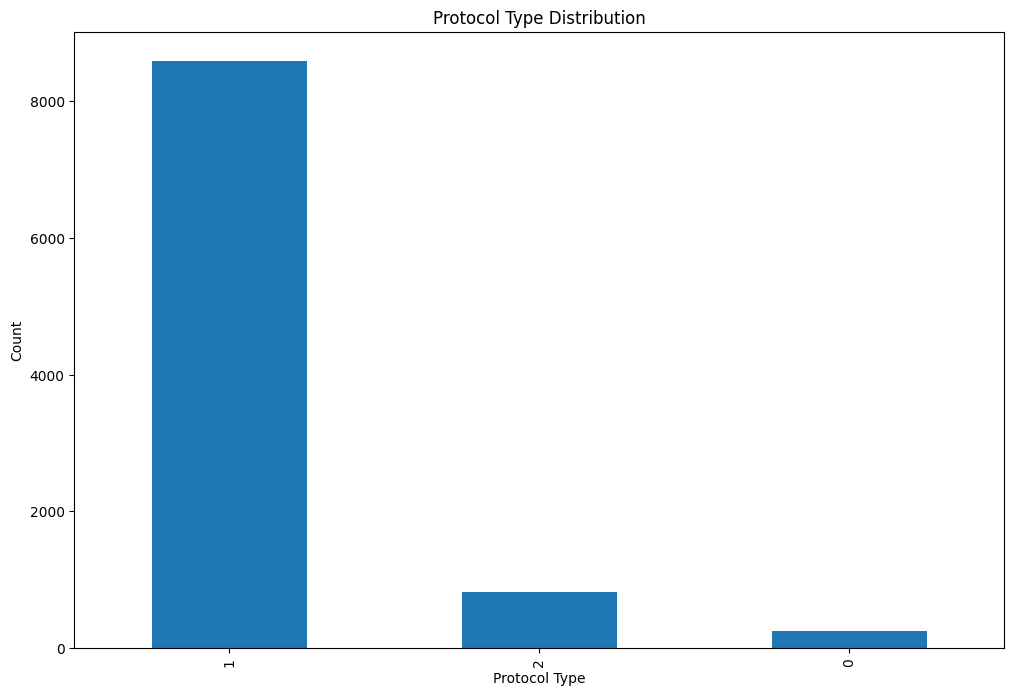

In [35]:
dataset['protocol_type'].value_counts().plot(kind='bar')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Type Distribution')
plt.show()

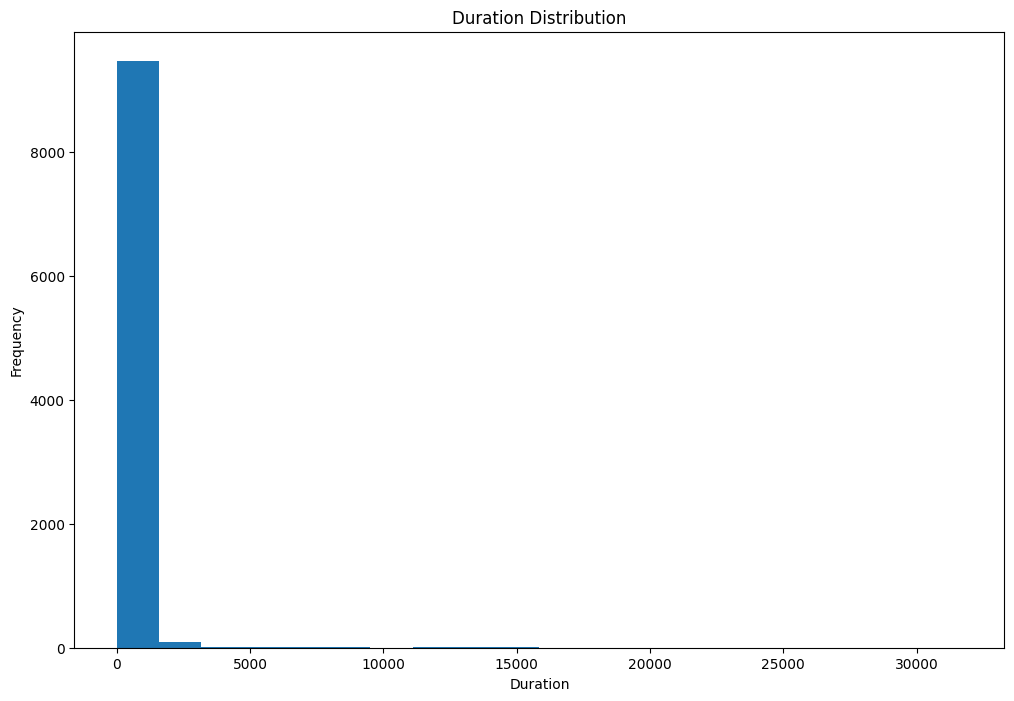

In [36]:
dataset['duration'].plot(kind='hist', bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration Distribution')
plt.show()

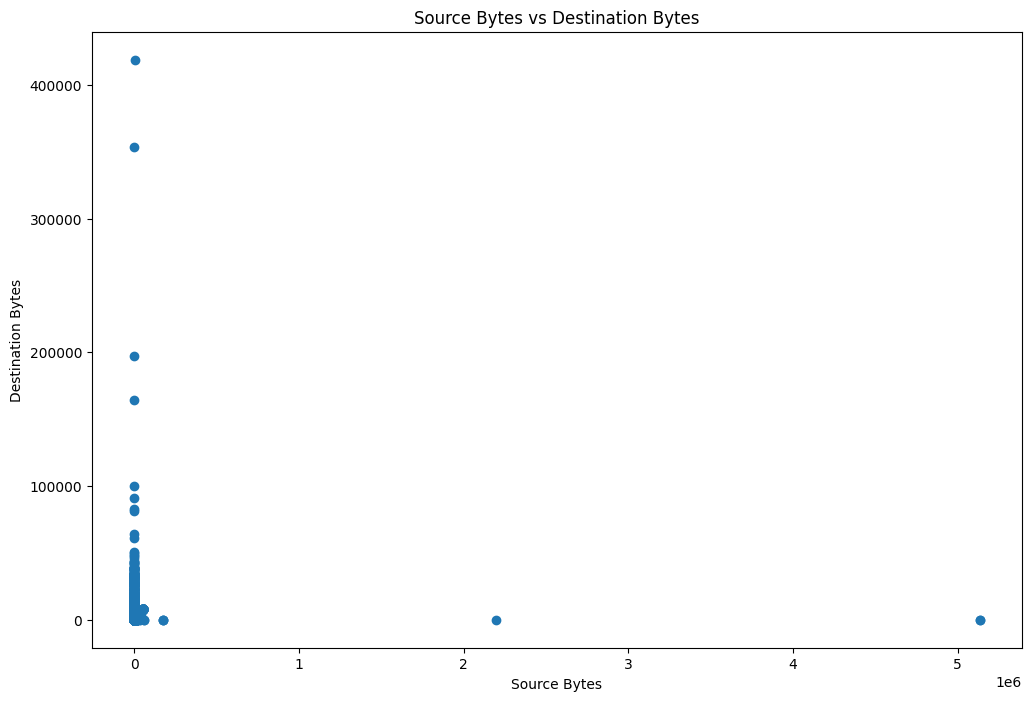

In [37]:
plt.scatter(dataset['src_bytes'], dataset['dst_bytes'])
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Source Bytes vs Destination Bytes')
plt.show()

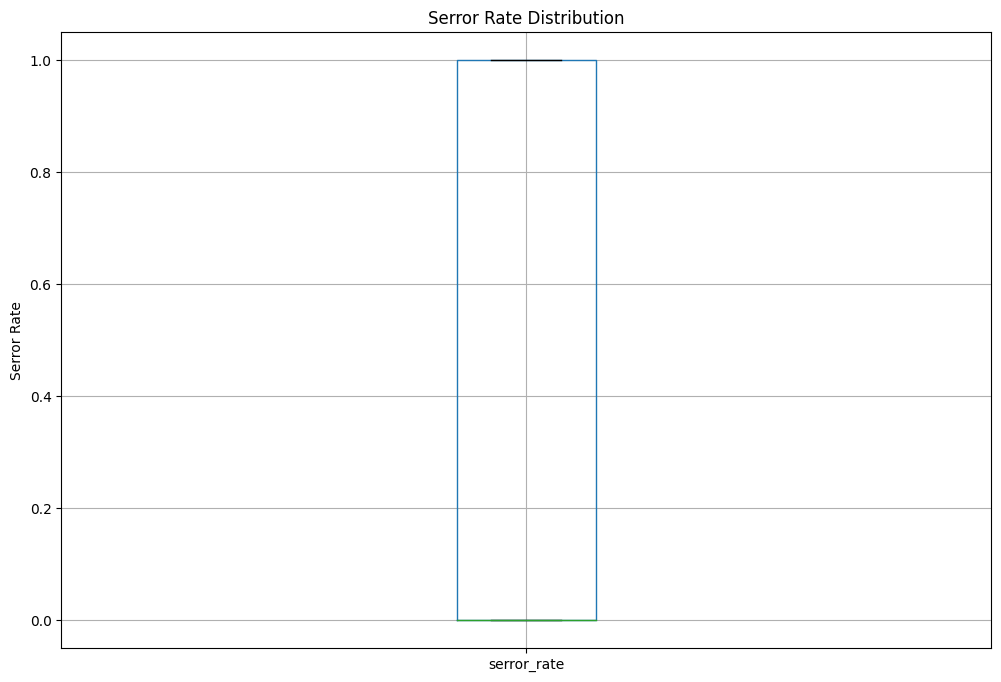

In [38]:
dataset.boxplot(column='serror_rate')
plt.ylabel('Serror Rate')
plt.title('Serror Rate Distribution')
plt.show()

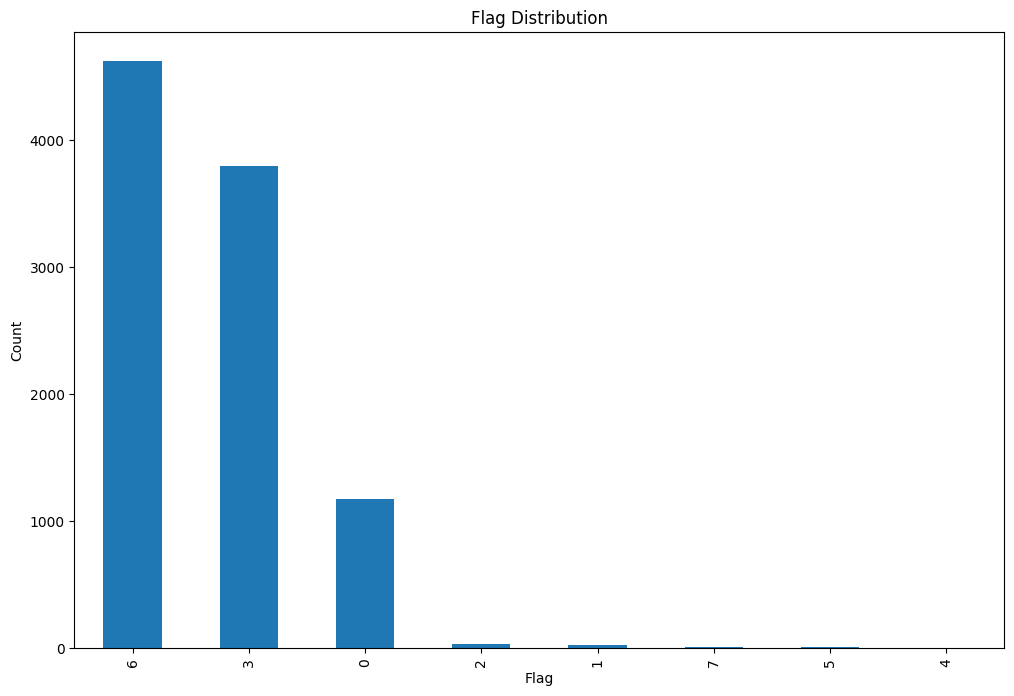

In [39]:
dataset['flag'].value_counts().plot(kind='bar')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Flag Distribution')
plt.show()

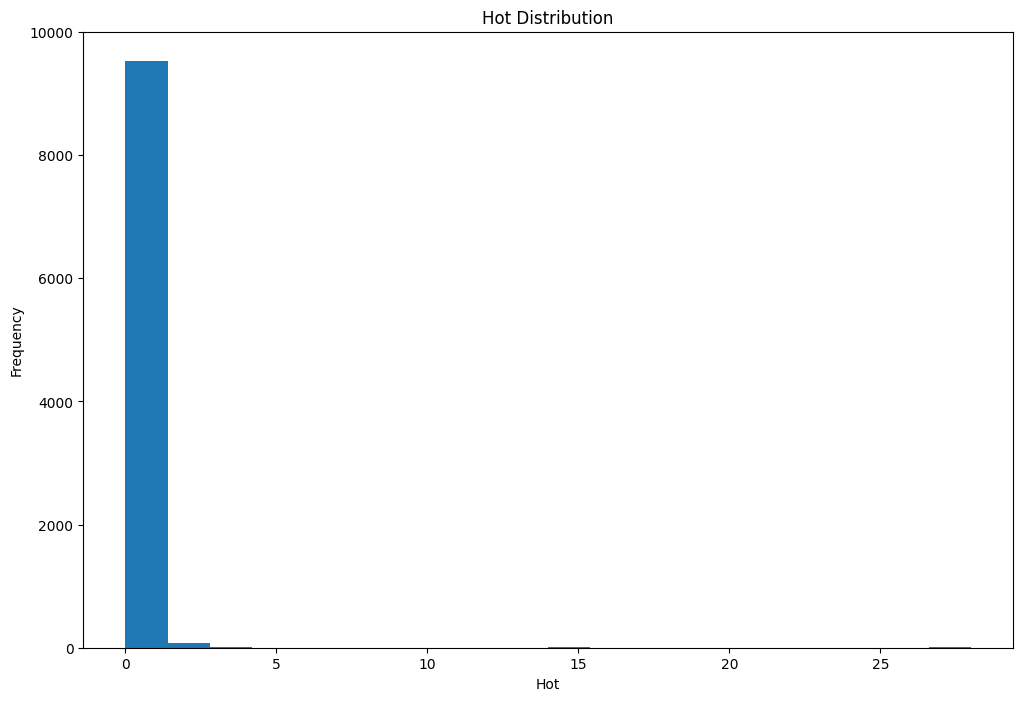

In [40]:
dataset['hot'].plot(kind='hist', bins=20)
plt.xlabel('Hot')
plt.ylabel('Frequency')
plt.title('Hot Distribution')
plt.show()

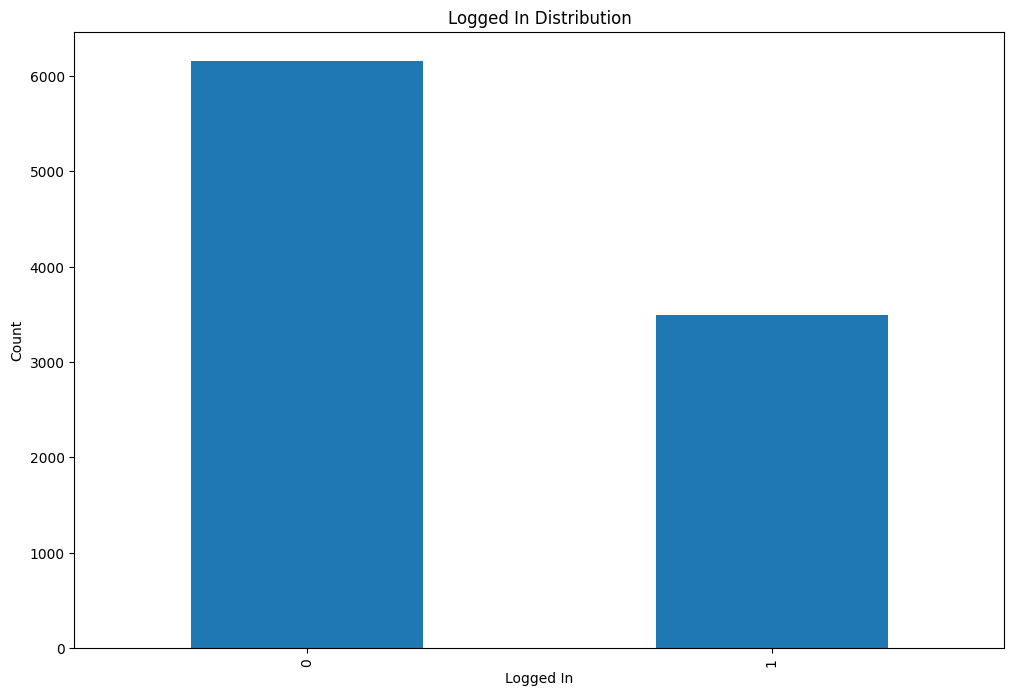

In [41]:
dataset['logged_in'].value_counts().plot(kind='bar')
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.title('Logged In Distribution')
plt.show()

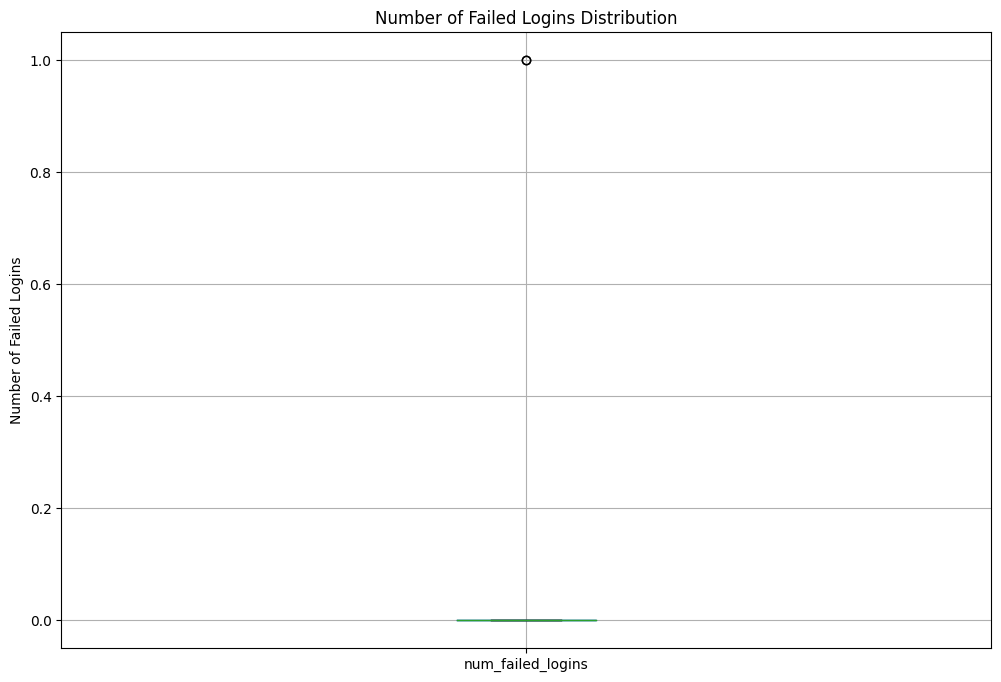

In [42]:
dataset.boxplot(column='num_failed_logins')
plt.ylabel('Number of Failed Logins')
plt.title('Number of Failed Logins Distribution')
plt.show()

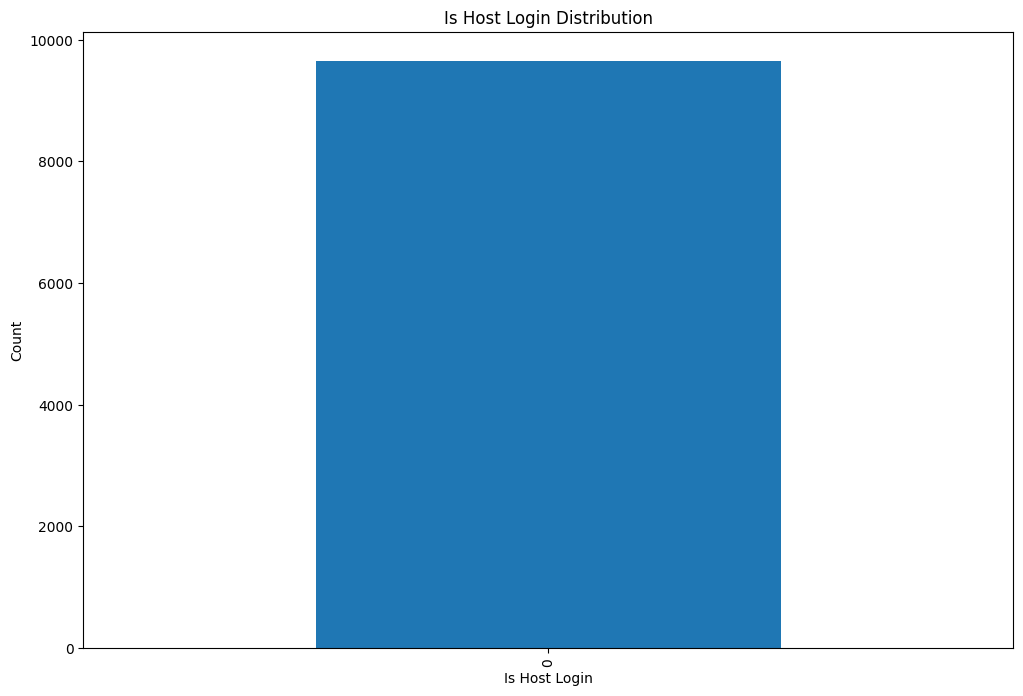

In [43]:
dataset['is_host_login'].value_counts().plot(kind='bar')
plt.xlabel('Is Host Login')
plt.ylabel('Count')
plt.title('Is Host Login Distribution')
plt.show()

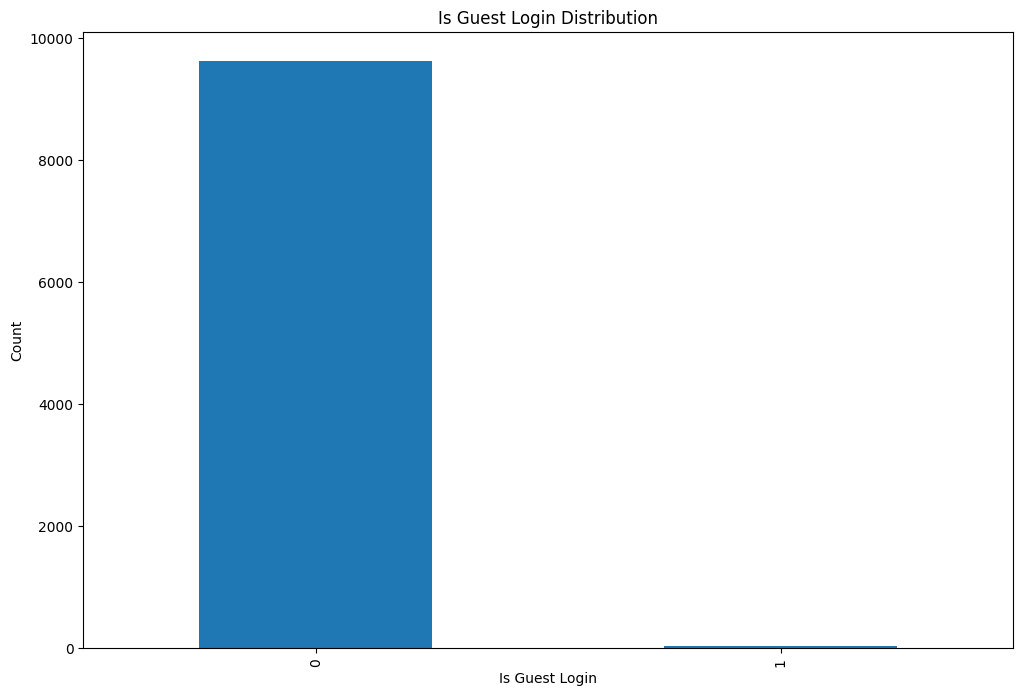

In [44]:
dataset['is_guest_login'].value_counts().plot(kind='bar')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Is Guest Login Distribution')
plt.show()

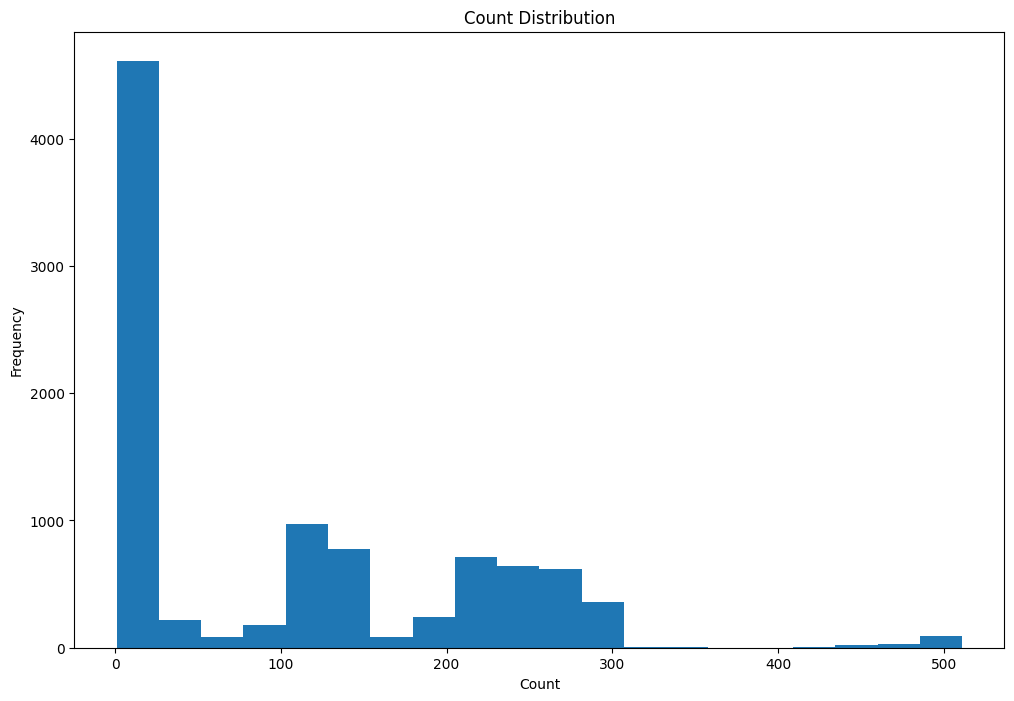

In [45]:
dataset['count'].plot(kind='hist', bins=20)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Count Distribution')
plt.show()

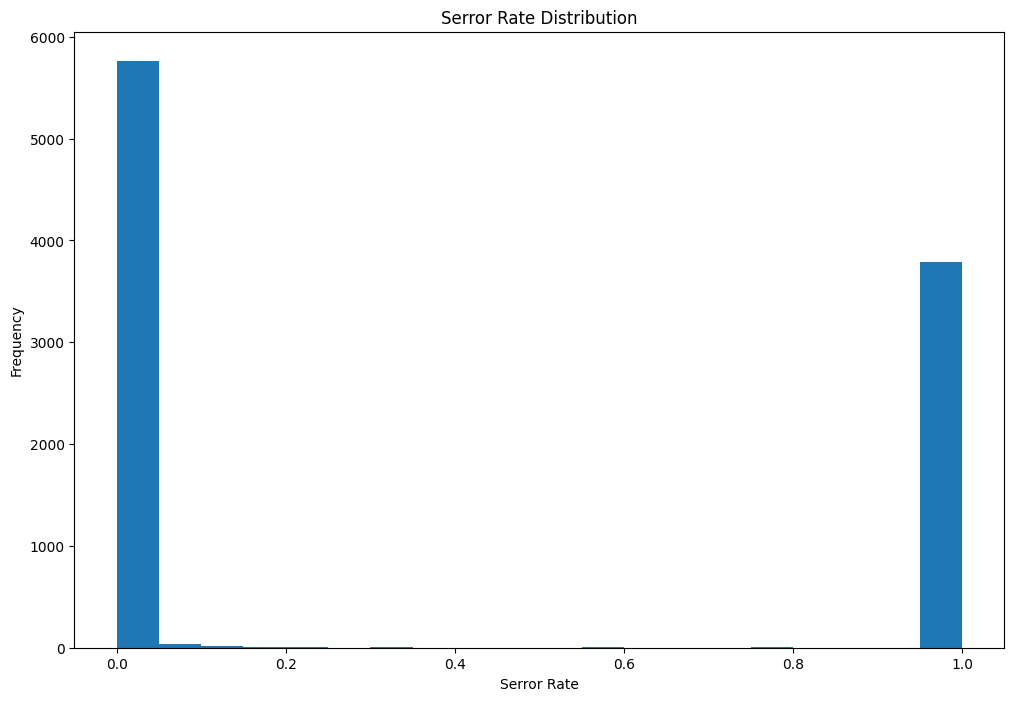

In [46]:
dataset['serror_rate'].plot(kind='hist', bins=20)
plt.xlabel('Serror Rate')
plt.ylabel('Frequency')
plt.title('Serror Rate Distribution')
plt.show()

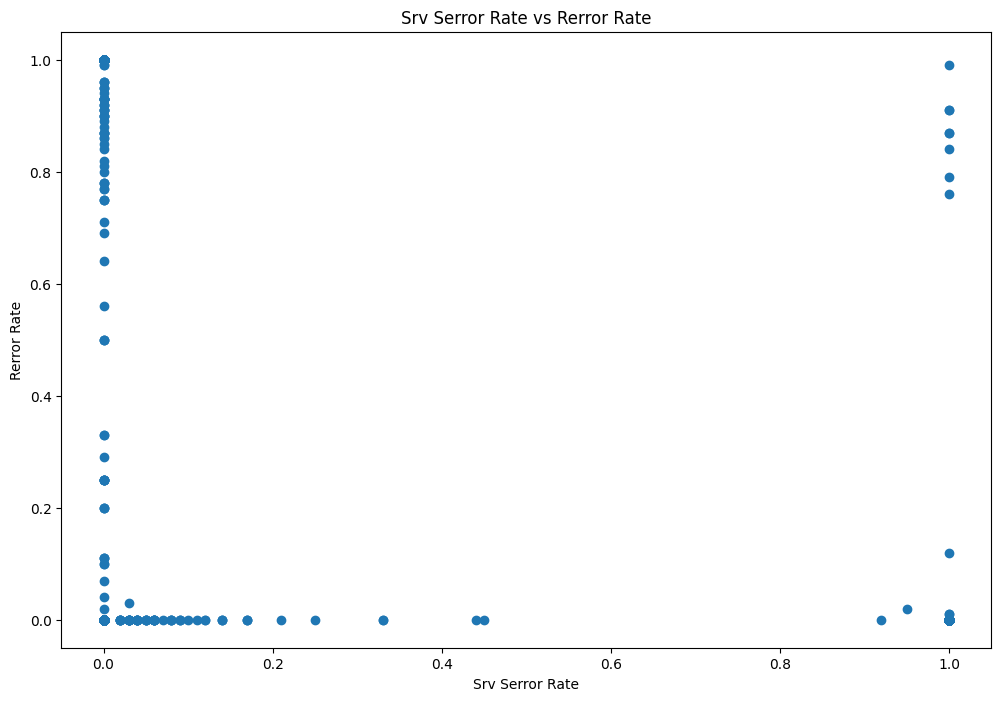

In [47]:
plt.scatter(dataset['srv_serror_rate'], dataset['rerror_rate'])
plt.xlabel('Srv Serror Rate')
plt.ylabel('Rerror Rate')
plt.title('Srv Serror Rate vs Rerror Rate')
plt.show()

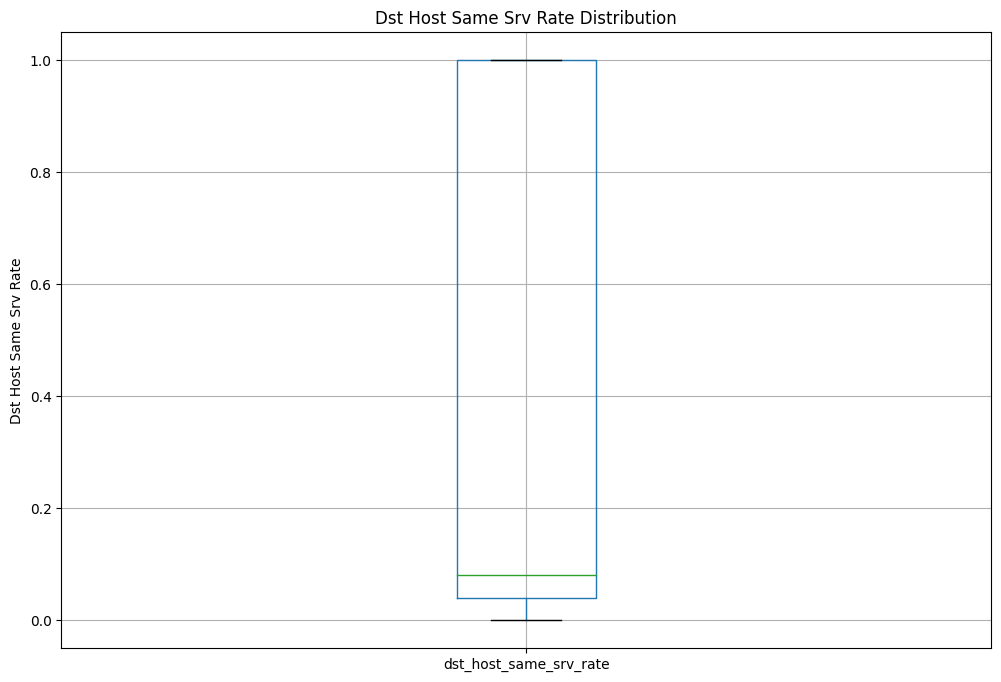

In [48]:
dataset.boxplot(column='dst_host_same_srv_rate')
plt.ylabel('Dst Host Same Srv Rate')
plt.title('Dst Host Same Srv Rate Distribution')
plt.show()

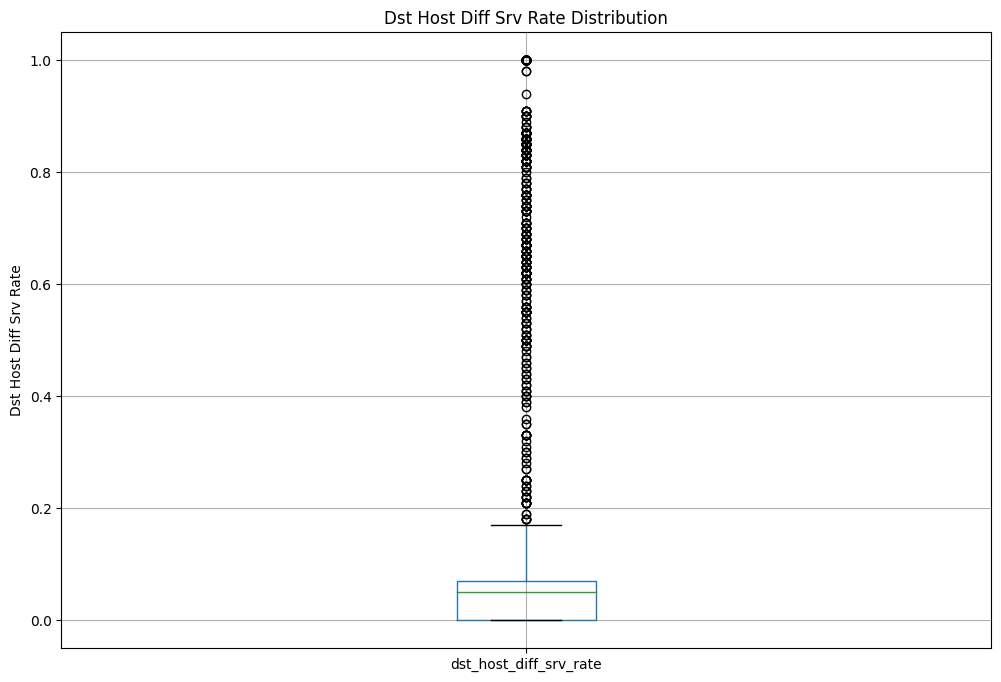

In [49]:
dataset.boxplot(column='dst_host_diff_srv_rate')
plt.ylabel('Dst Host Diff Srv Rate')
plt.title('Dst Host Diff Srv Rate Distribution')
plt.show()

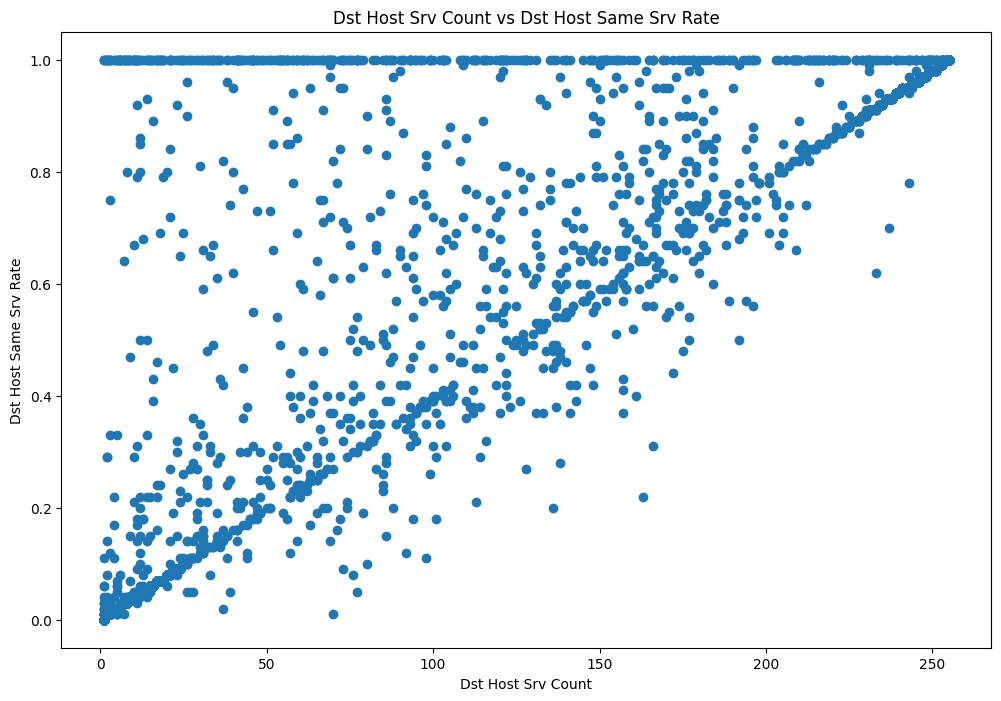

In [50]:
plt.scatter(dataset['dst_host_srv_count'], dataset['dst_host_same_srv_rate'])
plt.xlabel('Dst Host Srv Count')
plt.ylabel('Dst Host Same Srv Rate')
plt.title('Dst Host Srv Count vs Dst Host Same Srv Rate')
plt.show()

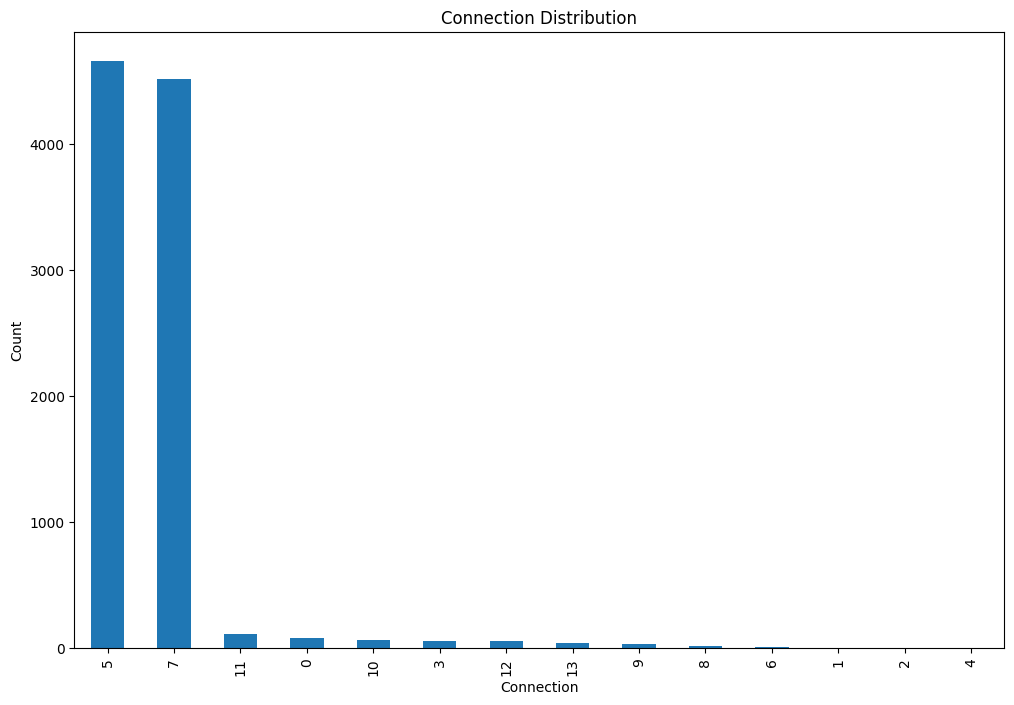

In [51]:
dataset['connection'].value_counts().plot(kind='bar')
plt.xlabel('Connection')
plt.ylabel('Count')
plt.title('Connection Distribution')
plt.show()

<Axes: title={'center': 'Heatmap of Correlation Matrix'}>

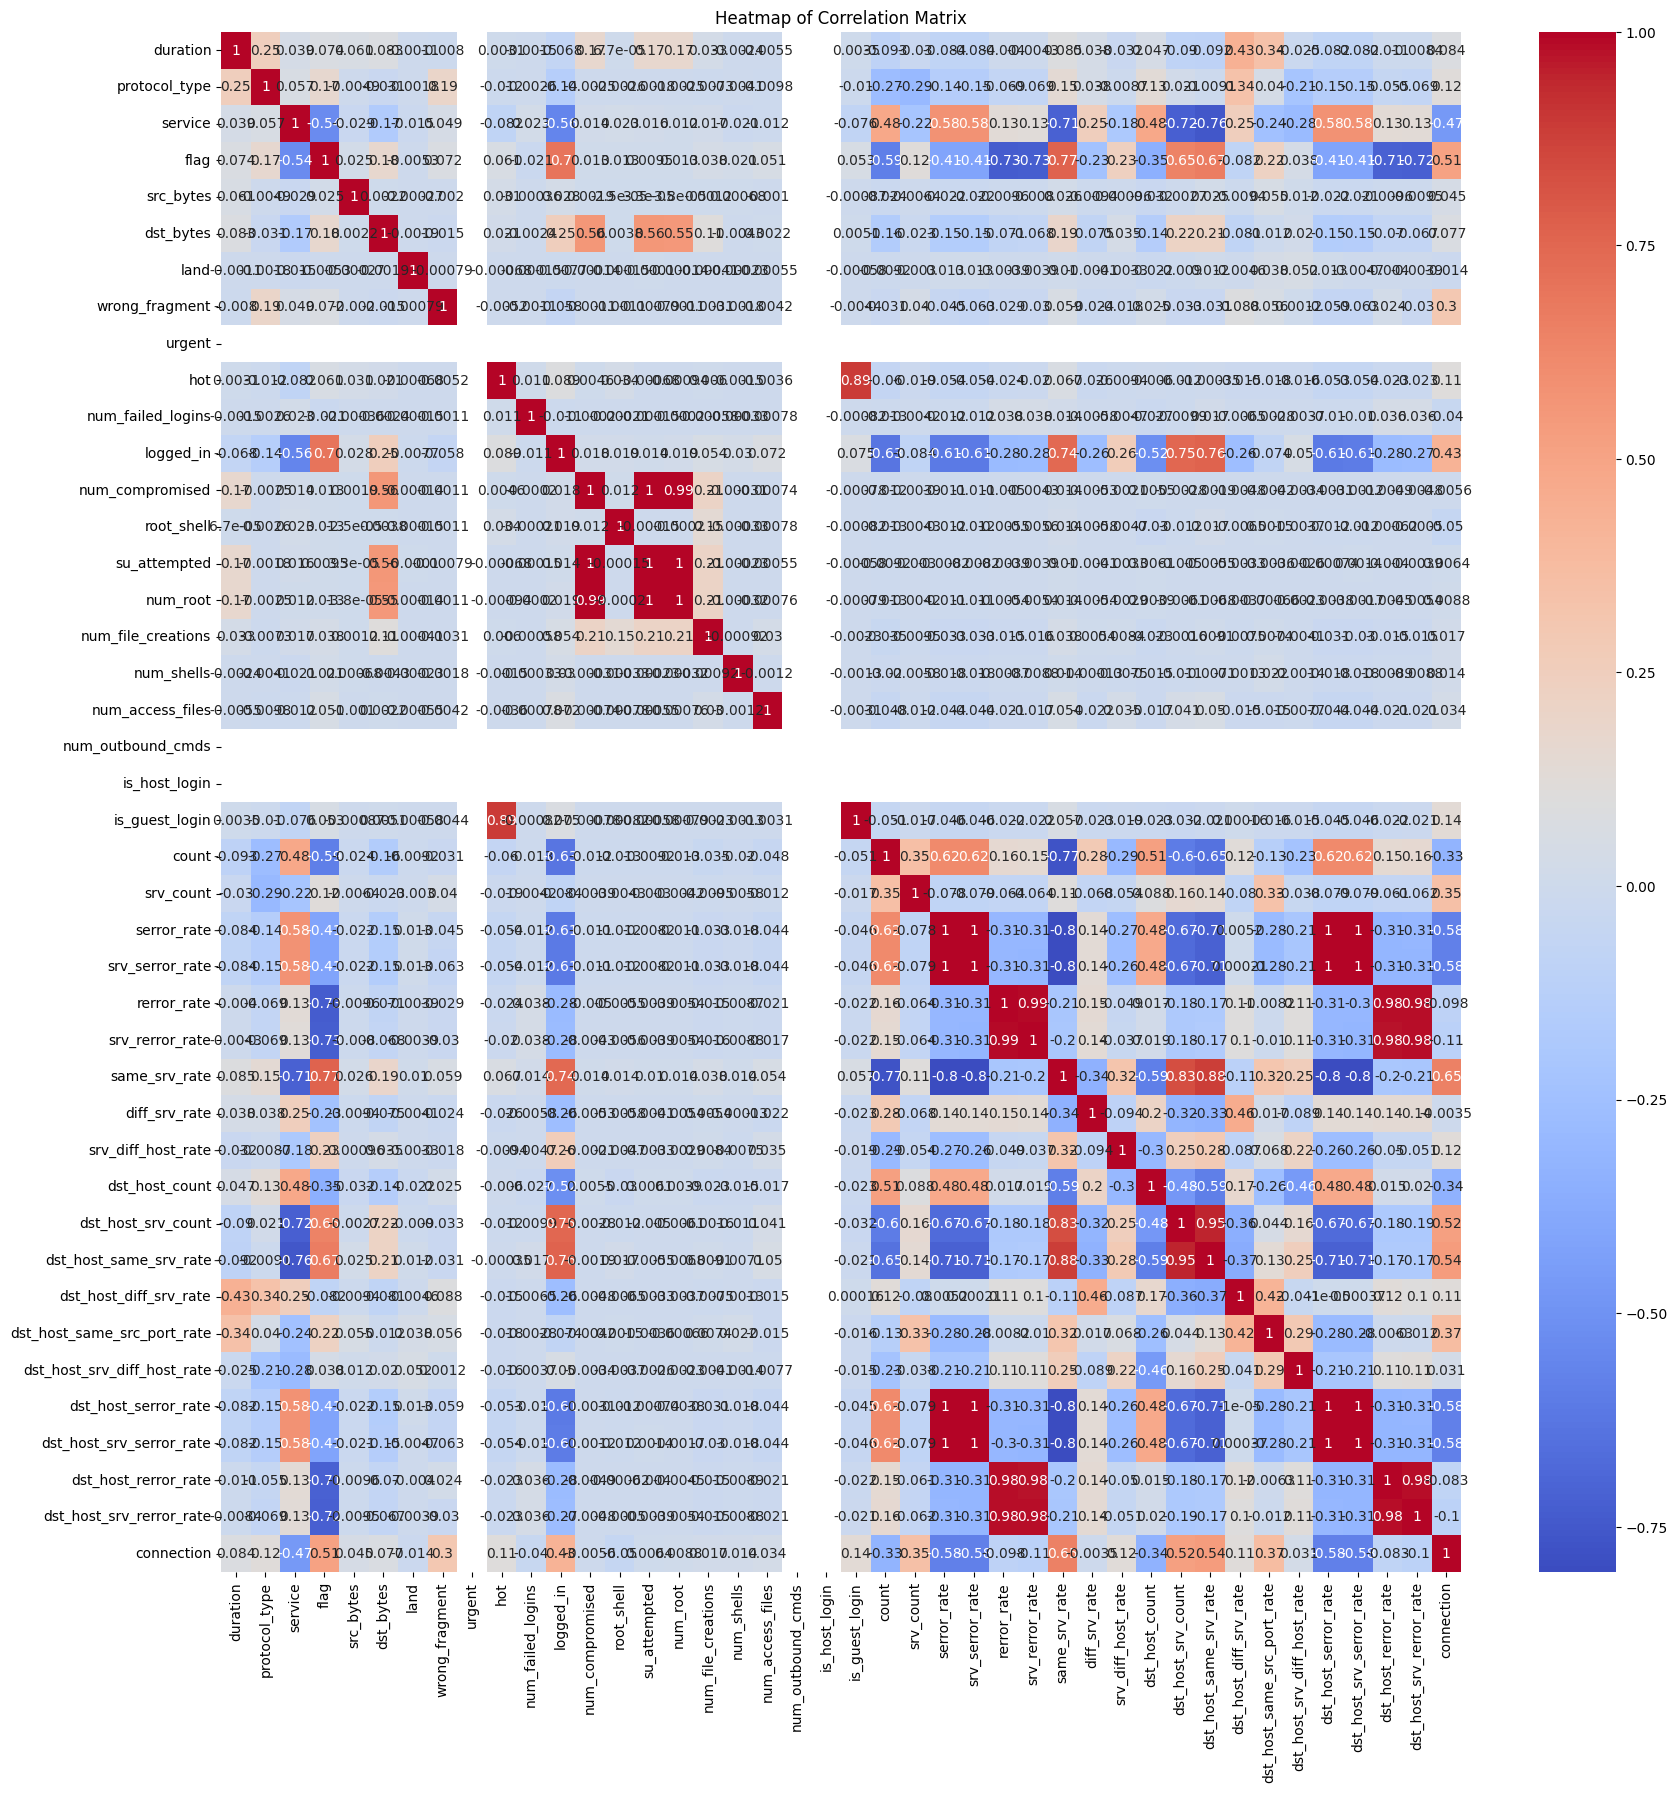

In [52]:
corr = dataset.corr()
plt.figure(figsize=(20, 20))
plt.title('Heatmap of Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Training and Splitting Data set into Test and Train


In [53]:
# Splitting the dataset into the Training set and Test set:
X_train, X_test, y_train, y_test = train_test_split(
    transformed_data, target, test_size=0.3, random_state=8)

# Different Classification Models


## Decision Tree Classifier


In [54]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

parameters = [
    {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_features": ["auto", "sqrt", "log2", None],
    }
]


random_search = GridSearchCV(decision_tree, parameters)
random_search.fit(X_train, y_train)
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [55]:
print("Evaluation for Decision Tree Classifier".center(75, '_'))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

decision_tree_prediction = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)
decision_tree_precision = precision_score(
    y_test, decision_tree_prediction, average="weighted")
decision_tree_recall = recall_score(
    y_test, decision_tree_prediction, average="weighted")
decision_tree_f1_score = f1_score(
    y_test, decision_tree_prediction, average="weighted")

print("Prediciton:    ", decision_tree_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(decision_tree_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(decision_tree_precision * 100)}%")
print("Recall:" + "\t\t" f"{(decision_tree_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(decision_tree_f1_score * 100)}%")
print('_' * 75)

__________________Evaluation for Decision Tree Classifier__________________
Prediciton:     [7 5 7 ... 7 5 7]
___________________________________________________________________________
Accuracy:	99.58534899792674%
Precision:	99.64880380693153%
Recall:		99.58534899792674%
F1-Score:	99.6029381922832%
___________________________________________________________________________


In [56]:
print("Confusion Matrix For Decision Tree Classifier - 'Labels Test' & 'Prediction':")
print("-" * 93)
print(confusion_matrix(y_test, decision_tree_prediction))

Confusion Matrix For Decision Tree Classifier - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[  28    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1369    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0]
 [   0    0    1    0    0 1370    0    0    0    1    0    6]
 [   0    0    0    0    0    1    4    0    0    0    0    0]
 [   0    0    0    0    0    0    0    7    0    0    0    0]
 [   0    0    0    1    0    1    0    0   19    0    0    0]
 [   0    0    0    0    0    0    0    0    0   37    0    0]
 [   0    0    0    0    0    0    0    0    0    0   17    0]
 [   0    0    0    0    0    1    0    0    0    0    0   11]]


In [57]:
print(
    "Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':"
)
print("-" * 97)
print(classification_report(y_test, decision_tree_prediction))

Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         1
           3       0.94      1.00      0.97        17
           5       1.00      1.00      1.00      1369
           6       1.00      1.00      1.00         2
           7       1.00      0.99      1.00      1378
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         7
          10       1.00      0.90      0.95        21
          11       0.97      1.00      0.99        37
          12       1.00      1.00      1.00        17
          13       0.65      0.92      0.76        12

    accuracy                           1.00      2894
   macro avg       0.96      0.97      0.96      2894
weighte

In [58]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index=transformed_data.columns, columns=[
                                  'importance']).sort_values('importance', ascending=False)
print(feature_importance)

                             importance
same_srv_rate                  0.813988
src_bytes                      0.039578
srv_count                      0.038124
dst_host_diff_srv_rate         0.022347
wrong_fragment                 0.018305
dst_host_srv_diff_host_rate    0.018081
serror_rate                    0.014650
dst_host_same_src_port_rate    0.006576
service                        0.005819
hot                            0.004891
dst_host_srv_count             0.004298
diff_srv_rate                  0.004127
flag                           0.002579
count                          0.001565
dst_host_same_srv_rate         0.001503
root_shell                     0.001079
duration                       0.000543
dst_host_srv_serror_rate       0.000542
num_failed_logins              0.000540
dst_host_count                 0.000457
dst_bytes                      0.000407
rerror_rate                    0.000000
srv_diff_host_rate             0.000000
dst_host_serror_rate           0.000000


<Axes: >

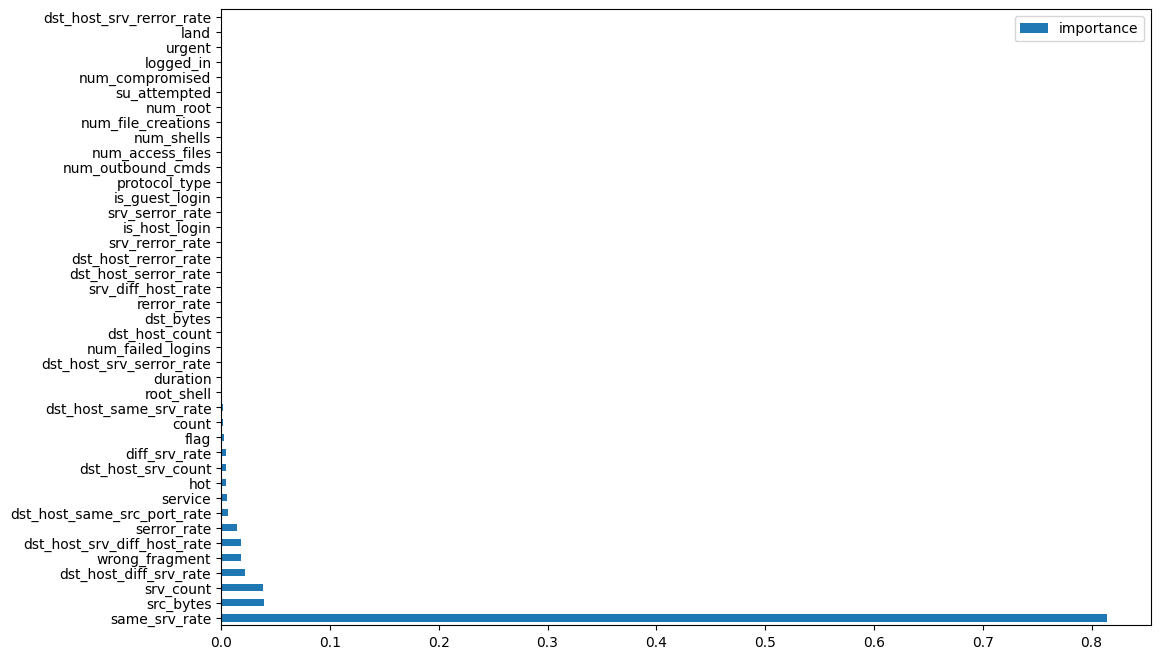

In [59]:
feature_importance.plot(kind="barh")

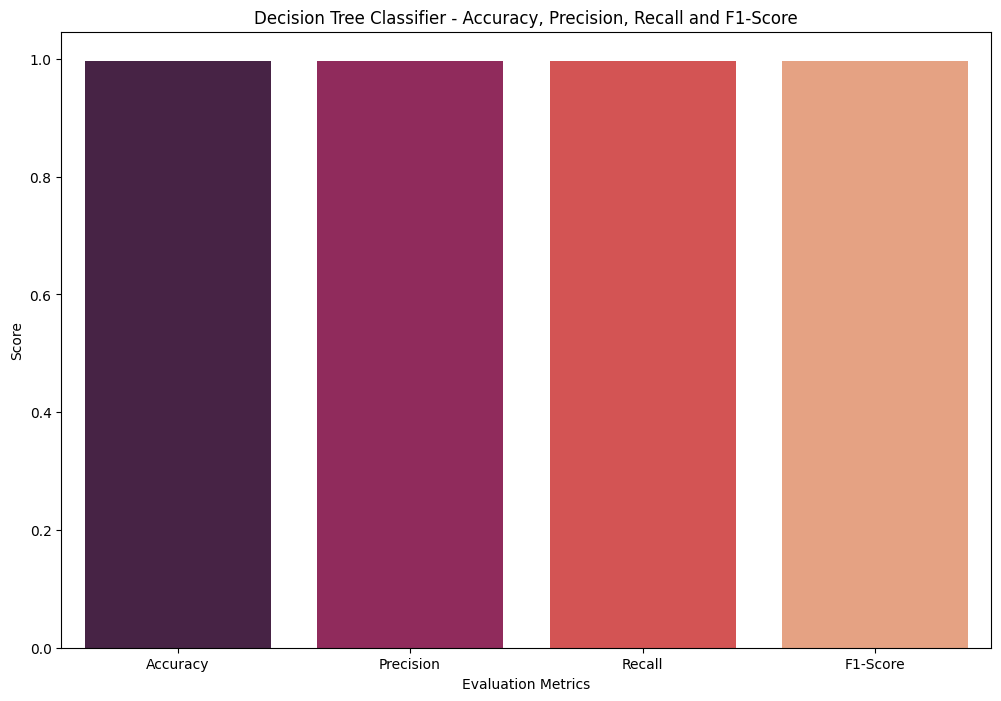

In [60]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [decision_tree_accuracy, decision_tree_precision,
                decision_tree_recall, decision_tree_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("Decision Tree Classifier - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## Random Forest Classifier


In [62]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

parameters = [
    {
        "n_estimators": [10, 50, 100, 150, 200],
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt", "log2", None],
    }
]

random_search = GridSearchCV(random_forest, parameters)
random_search.fit(X_train, y_train)
random_search.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150}

In [63]:
print("Evaluation for Random Forest Classifier".center(75, '_'))

random_forest_classifier = RandomForestClassifier(
    n_estimators=100, random_state=0)
random_forest_classifier.fit(X_train, y_train)

random_forest_classifier_prediction = random_forest_classifier.predict(X_test)
random_forest_classifier_accuracy = accuracy_score(
    y_test, random_forest_classifier_prediction)
random_forest_classifier_precision = precision_score(
    y_test, random_forest_classifier_prediction, average="weighted")
random_forest_classifier_recall = recall_score(
    y_test, random_forest_classifier_prediction, average="weighted")
random_forest_classifier_f1_score = f1_score(
    y_test, random_forest_classifier_prediction, average="weighted")

print("Prediciton:    ", random_forest_classifier_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(random_forest_classifier_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(random_forest_classifier_precision * 100)}%")
print("Recall:" + "\t\t" f"{(random_forest_classifier_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(random_forest_classifier_f1_score * 100)}%")
print('_' * 75)

__________________Evaluation for Random Forest Classifier__________________
Prediciton:     [7 5 7 ... 7 5 7]
___________________________________________________________________________
Accuracy:	99.7581202487906%
Precision:	99.75685941813039%
Recall:		99.7581202487906%
F1-Score:	99.74705422736305%
___________________________________________________________________________


In [64]:
print("Confusion Matrix For Random Forest Classifier - 'Labels Test' & 'Prediction':")
print("-" * 93)
print(confusion_matrix(y_test, random_forest_classifier_prediction))

Confusion Matrix For Random Forest Classifier - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[  27    0    0    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0   15    0    0    2    0    0    0    0    0    0]
 [   0    0    0 1369    0    0    0    0    0    0    0    0]
 [   0    0    1    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1378    0    0    0    0    0    0]
 [   0    0    0    0    0    1    4    0    0    0    0    0]
 [   0    0    0    0    0    0    0    7    0    0    0    0]
 [   0    0    0    0    0    2    0    0   19    0    0    0]
 [   0    0    0    0    0    0    0    0    0   37    0    0]
 [   0    0    0    0    0    0    0    0    0    0   17    0]
 [   0    0    0    0    0    0    0    0    0    0    0   12]]


In [65]:
print(
    "Classification Report For Random Forest Classifier - 'Labels Test' & 'Prediction':"
)
print("-" * 97)
print(classification_report(y_test, random_forest_classifier_prediction))

Classification Report For Random Forest Classifier - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           2       1.00      1.00      1.00         1
           3       0.94      0.88      0.91        17
           5       1.00      1.00      1.00      1369
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00      1378
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         7
          10       1.00      0.90      0.95        21
          11       1.00      1.00      1.00        37
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        12

    accuracy                           1.00      2894
   macro avg       0.99      0.92      0.95      2894
weighte

In [66]:
feature_importance = pd.Series(
    random_forest_classifier.feature_importances_, index=transformed_data.columns)
feature_importance

duration                       0.002921
protocol_type                  0.010580
service                        0.010049
flag                           0.091286
src_bytes                      0.096089
dst_bytes                      0.020975
land                           0.000061
wrong_fragment                 0.008091
urgent                         0.000000
hot                            0.008998
num_failed_logins              0.000094
logged_in                      0.017023
num_compromised                0.009098
root_shell                     0.000286
su_attempted                   0.000003
num_root                       0.000045
num_file_creations             0.000039
num_shells                     0.000008
num_access_files               0.000005
num_outbound_cmds              0.000000
is_host_login                  0.000000
is_guest_login                 0.000868
count                          0.126688
srv_count                      0.013102
serror_rate                    0.026127


<Axes: >

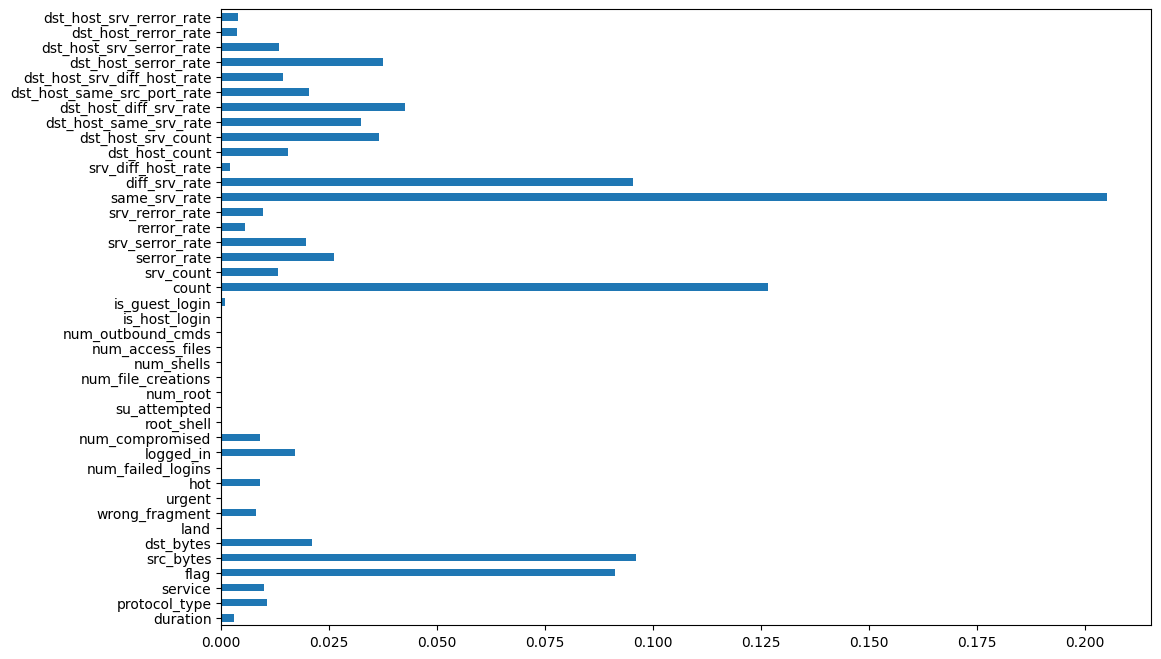

In [67]:
feature_importance.plot(kind="barh")

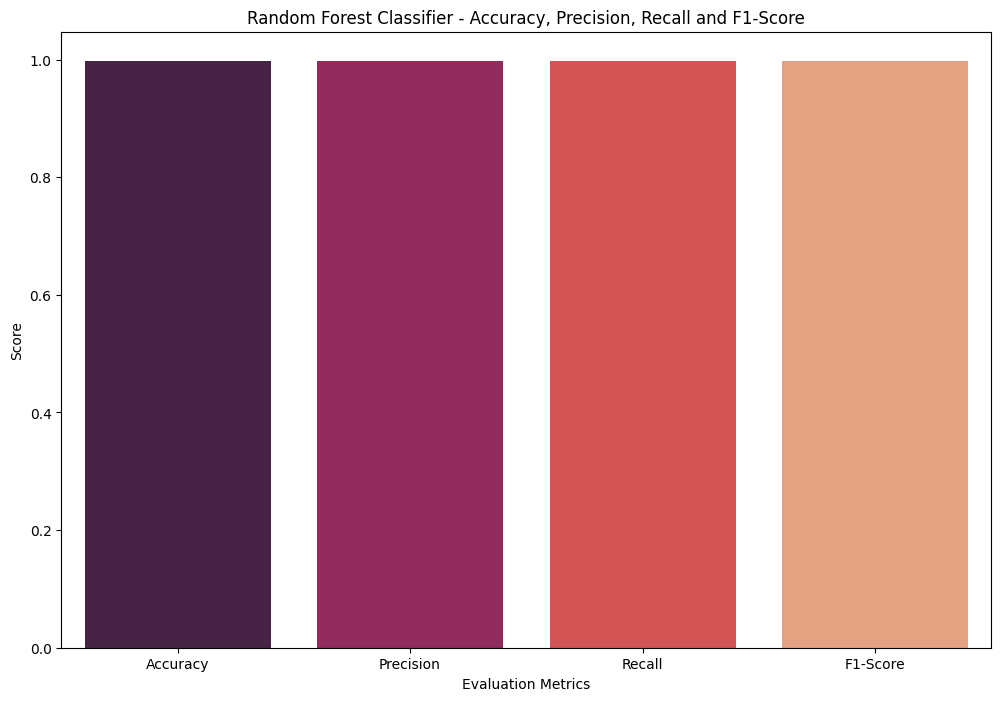

In [68]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [random_forest_classifier_accuracy, random_forest_classifier_precision,
                random_forest_classifier_recall, random_forest_classifier_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("Random Forest Classifier - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## K-Nearest Neighbors


In [69]:
# apply grid search to knn

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_param_grid = [
    {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
]

knn_grid_search = GridSearchCV(knn_model, knn_param_grid)
knn_grid_search.fit(X_train, y_train)
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [70]:
print("Evaluation for K-Nearest Neighbors".center(75, '_'))

k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5)
k_nearest_neighbors.fit(X_train, y_train)

k_nearest_neighbors_prediction = k_nearest_neighbors.predict(X_test)
k_nearest_neighbors_accuracy = accuracy_score(
    y_test, k_nearest_neighbors_prediction)
k_nearest_neighbors_precision = precision_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")
k_nearest_neighbors_recall = recall_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")
k_nearest_neighbors_f1_score = f1_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")

print("Prediciton:    ", k_nearest_neighbors_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(k_nearest_neighbors_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(k_nearest_neighbors_precision * 100)}%")
print("Recall:" + "\t\t" f"{(k_nearest_neighbors_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(k_nearest_neighbors_f1_score * 100)}%")
print('_' * 75)

_____________________Evaluation for K-Nearest Neighbors____________________
Prediciton:     [7 5 7 ... 7 5 7]
___________________________________________________________________________
Accuracy:	99.4125777470629%
Precision:	99.38196865110145%
Recall:		99.4125777470629%
F1-Score:	99.37604886671294%
___________________________________________________________________________


In [71]:
print("Confusion Matrix For K-Nearest Neighbors - 'Labels Test' & 'Prediction':")
print('-' * 93)
print(confusion_matrix(y_test, k_nearest_neighbors_prediction))

Confusion Matrix For K-Nearest Neighbors - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[  27    0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0]
 [   0    0   14    0    0    3    0    0    0    0    0    0]
 [   0    0    0 1368    0    1    0    0    0    0    0    0]
 [   0    0    1    0    1    0    0    0    0    0    0    0]
 [   0    0    0    1    0 1375    0    0    0    0    0    2]
 [   0    0    0    0    0    2    3    0    0    0    0    0]
 [   0    0    0    0    0    1    0    6    0    0    0    0]
 [   0    0    0    0    0    2    0    0   19    0    0    0]
 [   0    0    0    0    0    1    0    0    0   36    0    0]
 [   0    0    0    0    0    0    0    0    0    0   17    0]
 [   0    0    0    0    0    1    0    0    0    0    0   11]]


In [72]:
print("Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, k_nearest_neighbors_prediction))

Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           2       0.00      0.00      0.00         1
           3       0.93      0.82      0.87        17
           5       1.00      1.00      1.00      1369
           6       1.00      0.50      0.67         2
           7       0.99      1.00      0.99      1378
           8       1.00      0.60      0.75         5
           9       1.00      0.86      0.92         7
          10       1.00      0.90      0.95        21
          11       1.00      0.97      0.99        37
          12       1.00      1.00      1.00        17
          13       0.85      0.92      0.88        12

    accuracy                           0.99      2894
   macro avg       0.90      0.79      0.83      2894
weighted avg

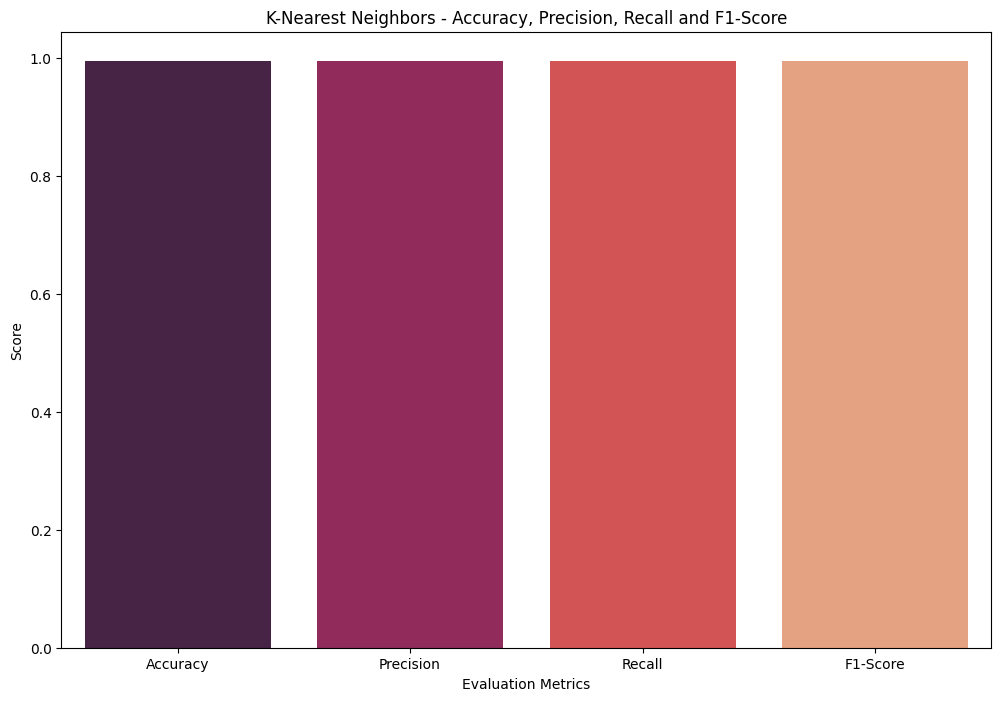

In [73]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [k_nearest_neighbors_accuracy, k_nearest_neighbors_precision,
                k_nearest_neighbors_recall, k_nearest_neighbors_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("K-Nearest Neighbors - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## Ada Boost


In [74]:
# apply grid search to ada boost

from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier()

ada_boost_param_grid = [
    {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
        'algorithm': ['SAMME', 'SAMME.R']
    }
]

ada_boost_grid_search = GridSearchCV(ada_boost_model, ada_boost_param_grid)
ada_boost_grid_search.fit(X_train, y_train)
ada_boost_grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}

In [75]:
print("Evaluation for Ada Boost".center(75, "_"))

ada_boast = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boast.fit(X_train, y_train)

ada_boost_prediction = ada_boast.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_prediction)
ada_boost_precision = precision_score(y_test, ada_boost_prediction, average="weighted")
ada_boost_recall = recall_score(y_test, ada_boost_prediction, average="weighted")
ada_boost_f1_score = f1_score(y_test, ada_boost_prediction, average="weighted")

print("Prediciton:    ", ada_boost_prediction)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(ada_boost_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(ada_boost_precision * 100)}%")
print("Recall:" + "\t\t" f"{(ada_boost_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(ada_boost_f1_score * 100)}%")
print("_" * 75)

__________________________Evaluation for Ada Boost_________________________
Prediciton:     [7 5 7 ... 7 5 7]
___________________________________________________________________________
Accuracy:	94.54042847270215%
Precision:	90.44681039482695%
Recall:		94.54042847270215%
F1-Score:	92.41413986165499%
___________________________________________________________________________


In [76]:
print("Confusion Matrix For Ada Boast - 'Labels Test' & 'Prediction':")
print('-' * 93)
print(confusion_matrix(y_test, ada_boost_prediction))

Confusion Matrix For Ada Boast - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[   0    0    0    0    0   28    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   17    0    0    0    0    0    0]
 [   0    0    0 1349    0   20    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    9    0 1369    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    4    0]
 [   0    0    0    0    0    7    0    0    0    0    0    0]
 [   0    0    0   21    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   37    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   17    0]
 [   0    0    0    0    0   12    0    0    0    0    0    0]]


In [77]:
print("Classification Report For Ada Boast - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, ada_boost_prediction))

Classification Report For Ada Boast - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00        17
           5       0.98      0.99      0.98      1369
           6       0.00      0.00      0.00         2
           7       0.92      0.99      0.95      1378
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        37
          12       0.81      1.00      0.89        17
          13       0.00      0.00      0.00        12

    accuracy                           0.95      2894
   macro avg       0.31      0.33      0.32      2894
weighted avg       0.9

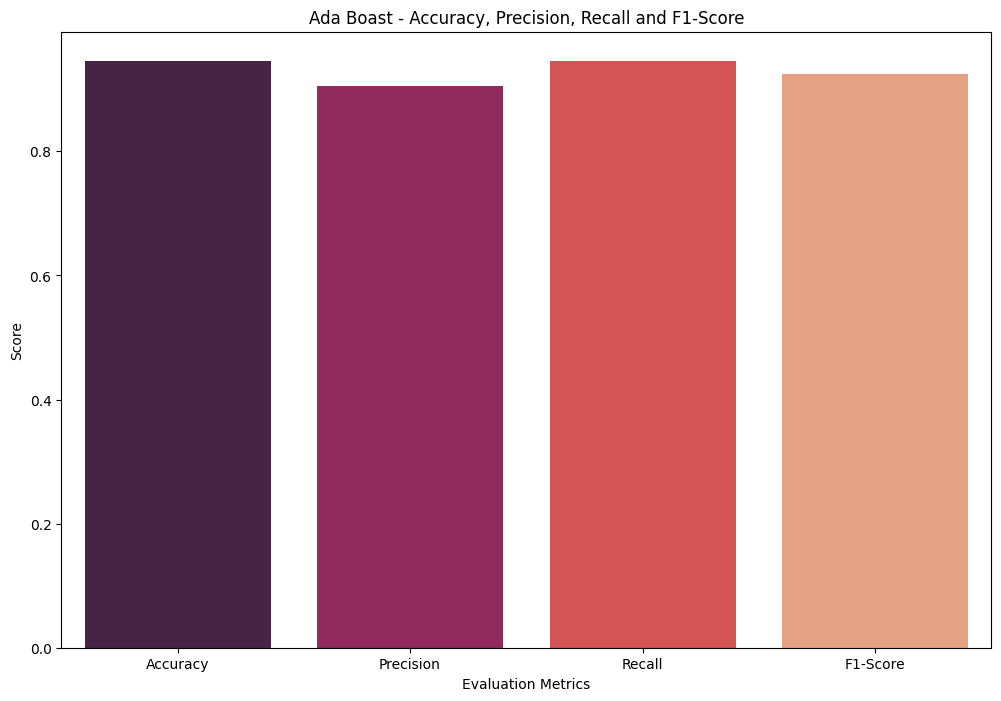

In [78]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [ada_boost_accuracy, ada_boost_precision,
                ada_boost_recall, ada_boost_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("Ada Boast - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## Gradient Boosting


In [79]:
# apply grid search to gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

gradient_boost_model = GradientBoostingClassifier()

gradient_boost_param_grid = [
    {
        'loss': ['deviance', 'exponential'],
        'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'criterion': ['friedman_mse', 'mse', 'mae']
    }
]

gradient_boost_grid_search = GridSearchCV(
    gradient_boost_model, gradient_boost_param_grid)
gradient_boost_grid_search.fit(X_train, y_train)
gradient_boost_grid_search.best_params_

In [ ]:
print("Evaluation for Gradient Boosting".center(75, "_"))

gradient_boosting = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
)
gradient_boosting.fit(X_train, y_train)

gradient_boosting_prediction = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_prediction)
gradient_boosting_precision = precision_score(
    y_test, gradient_boosting_prediction, average="weighted"
)
gradient_boosting_recall = recall_score(
    y_test, gradient_boosting_prediction, average="weighted"
)
gradient_boosting_f1_score = f1_score(
    y_test, gradient_boosting_prediction, average="weighted"
)

print("Prediciton:    ", gradient_boosting_prediction)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(gradient_boosting_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(gradient_boosting_precision * 100)}%")
print("Recall:" + "\t\t" f"{(gradient_boosting_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(gradient_boosting_f1_score * 100)}%")
print("_" * 75)

______________________Evaluation for Gradient Boosting_____________________


Prediciton:     [ 8  8  6 ...  6 12  6]
___________________________________________________________________________
Accuracy:	92.86197564276048%
Precision:	90.54468759410342%
Recall:		92.86197564276048%
F1-Score:	91.66531800096436%
___________________________________________________________________________


In [ ]:
print("Confusion Matrix For Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 93)
print(confusion_matrix(y_test, gradient_boosting_prediction))

Confusion Matrix For Gradient Boosting - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[   0    0    0    0    0   29    0    0    2    0    0    0]
 [   0    0    0    0    0    1    0    0    1    0    0    0]
 [   0    0    0    0    0   15    0    0    3    0    0    0]
 [   0    0    0 1392    0    3    0    0    8    0    0    0]
 [   0    0    0    0    0    2    0    0    1    0    0    0]
 [   0    0    0    1    0 1353    0    0   48    0    0    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    1    0   13    0    0    4    0    0    0]
 [   0    0    0    1    0   17    0    0    0    0    0    0]
 [   0    0    0    0    0   30    0    0    0    0    0    0]
 [   0    0    0    0    0   13    0    0    0    0    0    0]
 [   0    0    0    0    0    8    0    0    8    0    0    0]]


In [ ]:
print("Classification Report For Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, gradient_boosting_prediction))

Classification Report For Gradient Boosting - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           6       1.00      0.99      0.99      1403
           7       0.00      0.00      0.00         3
           8       0.91      0.97      0.94      1402
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        16

    accuracy                           0.93      2956
   macro avg       0.16      0.16      0.16      2956
weighted avg  

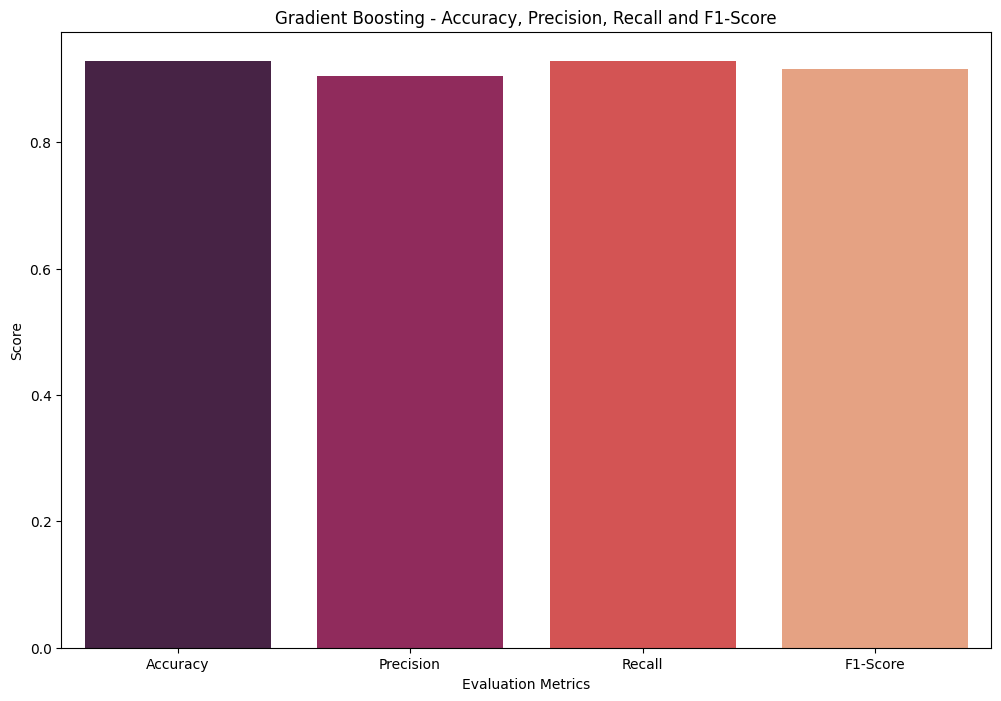

In [ ]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [gradient_boosting_accuracy, gradient_boosting_precision,
                gradient_boosting_recall, gradient_boosting_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("Gradient Boosting - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## Hist Gradient Boosting


In [ ]:
# apply grid search to hist gradient boosting

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boost_model = HistGradientBoostingClassifier()

hist_gradient_boost_param_grid = [
    {
        'loss': ['binary_crossentropy', 'categorical_crossentropy'],
        'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
        'max_iter': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'max_depth': [1, 2, 3, 4, 5, 6, 7]

    }
]

hist_gradient_boost_grid_search = GridSearchCV(
    hist_gradient_boost_model, hist_gradient_boost_param_grid)
hist_gradient_boost_grid_search.fit(X_train, y_train)
hist_gradient_boost_grid_search.best_params_

In [ ]:
print("Evaluation for Hist Gradient Boosting".center(75, "_"))

hist_gradient_boosting = HistGradientBoostingClassifier(
    loss="auto", learning_rate=0.1, max_iter=100, max_leaf_nodes=31, random_state=0
)
hist_gradient_boosting.fit(X_train, y_train)

hist_gradient_boosting_prediction = hist_gradient_boosting.predict(X_test)
hist_gradient_boosting_accuracy = accuracy_score(
    y_test, hist_gradient_boosting_prediction
)
hist_gradient_boosting_precision = precision_score(
    y_test, hist_gradient_boosting_prediction, average="weighted"
)
hist_gradient_boosting_recall = recall_score(
    y_test, hist_gradient_boosting_prediction, average="weighted"
)
hist_gradient_boosting_f1_score = f1_score(
    y_test, hist_gradient_boosting_prediction, average="weighted"
)

print("Prediciton:    ", hist_gradient_boosting_prediction)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(hist_gradient_boosting_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(hist_gradient_boosting_precision * 100)}%")
print("Recall:" + "\t\t" f"{(hist_gradient_boosting_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(hist_gradient_boosting_f1_score * 100)}%")
print("_" * 75)

___________________Evaluation for Hist Gradient Boosting___________________


Prediciton:     [8 8 6 ... 6 8 6]
___________________________________________________________________________
Accuracy:	93.09878213802436%
Precision:	90.23417722581442%
Recall:		93.09878213802436%
F1-Score:	91.57864391202722%
___________________________________________________________________________


In [ ]:
print("Confusion Matrix For Hist Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 93)
print(confusion_matrix(y_test, hist_gradient_boosting_prediction))

Confusion Matrix For Hist Gradient Boosting - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[   0    0    0    0    0   31    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0   18    0    0    0    0    0    0]
 [   1    0   10 1385    0    3    0    0    4    0    0    0]
 [   0    0    0    0    0    3    0    0    0    0    0    0]
 [   3    0   19    5    0 1366    0    1    0    8    0    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0   17    0    1    0    0    0    0]
 [   0    0    0   17    0    1    0    0    0    0    0    0]
 [   0    0    0   28    0    2    0    0    0    0    0    0]
 [   0    0    8    1    0    3    0    1    0    0    0    0]
 [   0    0    0    0    0   16    0    0    0    0    0    0]]


In [ ]:
print("Classification Report For Hist Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, hist_gradient_boosting_prediction))

Classification Report For Hist Gradient Boosting - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           6       0.96      0.99      0.98      1403
           7       0.00      0.00      0.00         3
           8       0.93      0.97      0.95      1402
          10       0.00      0.00      0.00         2
          11       0.33      0.06      0.10        18
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        16

    accuracy                           0.93      2956
   macro avg       0.19      0.17      0.17      2956
weighted 

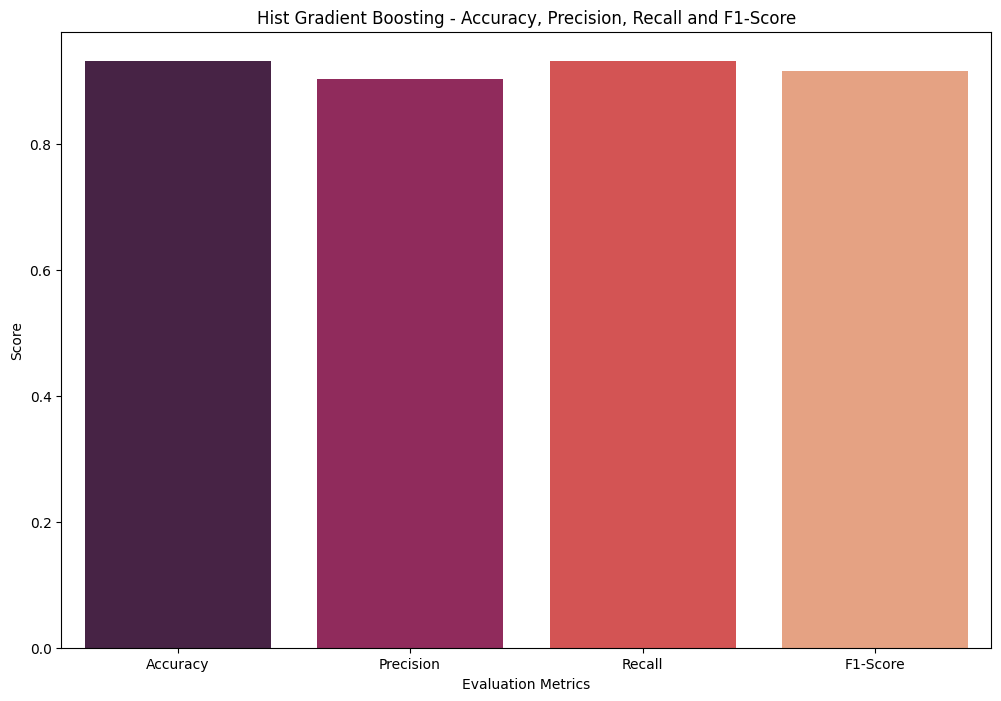

In [ ]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [
    hist_gradient_boosting_accuracy,
    hist_gradient_boosting_precision,
    hist_gradient_boosting_recall,
    hist_gradient_boosting_f1_score,
]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("Hist Gradient Boosting - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## XGBoost Classifier


In [ ]:
# apply grid search to xgboost

from xgboost import XGBClassifier

xgboost_model = XGBClassifier()

xgboost_param_grid = [
    {
        'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
        'max_depth': [1, 2, 3, 4, 5, 6, 7],
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

    }
]

xgboost_grid_search = GridSearchCV(xgboost_model, xgboost_param_grid)
xgboost_grid_search.fit(X_train, y_train)
xgboost_grid_search.best_params_

In [ ]:
print("Evaluation for XGBoost".center(75, '_'))

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

xgboost_prediction = xgboost.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_prediction)
xgboost_precision = precision_score(
    y_test, xgboost_prediction, average="weighted")
xgboost_recall = recall_score(y_test, xgboost_prediction, average="weighted")
xgboost_f1_score = f1_score(y_test, xgboost_prediction, average="weighted")


print("Prediciton:    ", xgboost_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(xgboost_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(xgboost_precision * 100)}%")
print("Recall:" + "\t\t" f"{(xgboost_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(xgboost_f1_score * 100)}%")

___________________________Evaluation for XGBoost__________________________


Prediciton:     [8 8 6 ... 6 8 6]
___________________________________________________________________________
Accuracy:	99.39106901217862%
Precision:	99.39169284767809%
Recall:		99.39106901217862%
F1-Score:	99.36882645593916%


In [ ]:
print("Confusion Matrix For XGBoost - 'Labels Test' & 'Prediction':")
print('-' * 93)
print(confusion_matrix(y_test, xgboost_prediction))

Confusion Matrix For XGBoost - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[  28    0    0    0    0    3    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    0    0]
 [   0    0   16    0    1    0    0    1    0    0    0    0]
 [   0    0    0 1402    0    1    0    0    0    0    0    0]
 [   0    0    0    0    2    1    0    0    0    0    0    0]
 [   0    0    0    0    0 1402    0    0    0    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    1    0    2    0   13    2    0    0    0]
 [   0    0    0    0    0    1    0    0   17    0    0    0]
 [   0    0    0    0    0    0    0    0    0   30    0    0]
 [   0    0    0    0    0    0    0    0    1    0   12    0]
 [   2    0    0    0    0    2    0    0    0    0    0   12]]


In [ ]:
print("Classification Report For XGBoost - 'Labels Test' & 'Prediction':")
print("-" * 97)
print(classification_report(y_test, xgboost_prediction))

Classification Report For XGBoost - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           3       1.00      1.00      1.00         2
           4       1.00      0.89      0.94        18
           6       1.00      1.00      1.00      1403
           7       0.67      0.67      0.67         3
           8       0.99      1.00      1.00      1402
          10       1.00      1.00      1.00         2
          11       0.93      0.72      0.81        18
          12       0.85      0.94      0.89        18
          13       1.00      1.00      1.00        30
          14       1.00      0.92      0.96        13
          15       1.00      0.75      0.86        16

    accuracy                           0.99      2956
   macro avg       0.95      0.90      0.92      2956
weighted avg       0.99 

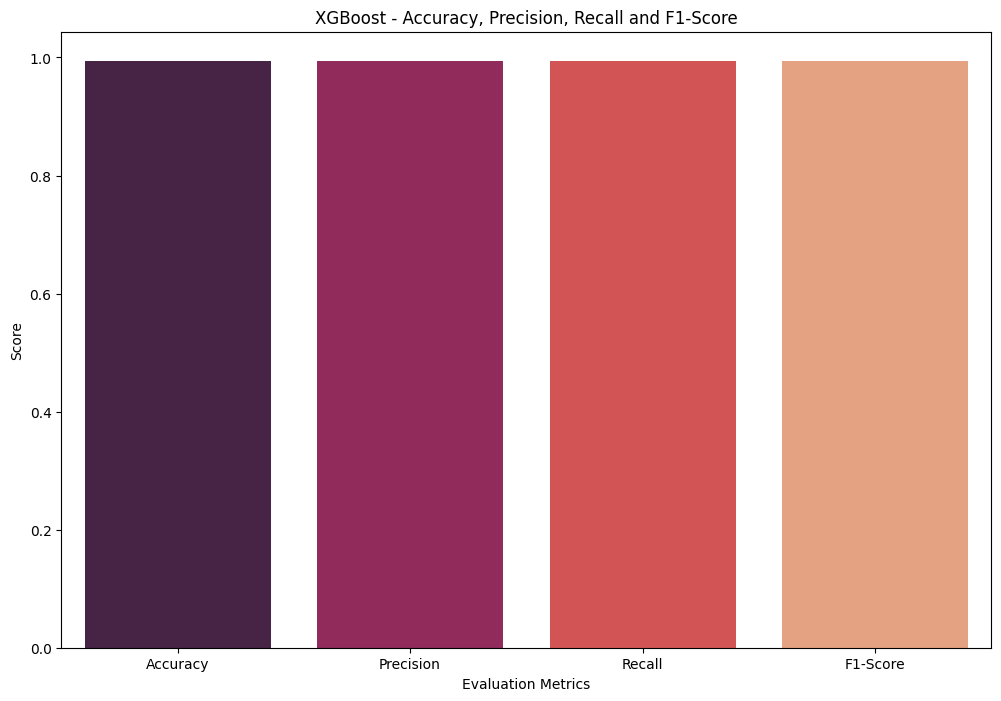

In [ ]:
season = ["Accuracy", "Precision", "Recall", "F1-Score"]
season_score = [xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_f1_score]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("XGBoost - Accuracy, Precision, Recall and F1-Score")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

# Comparison


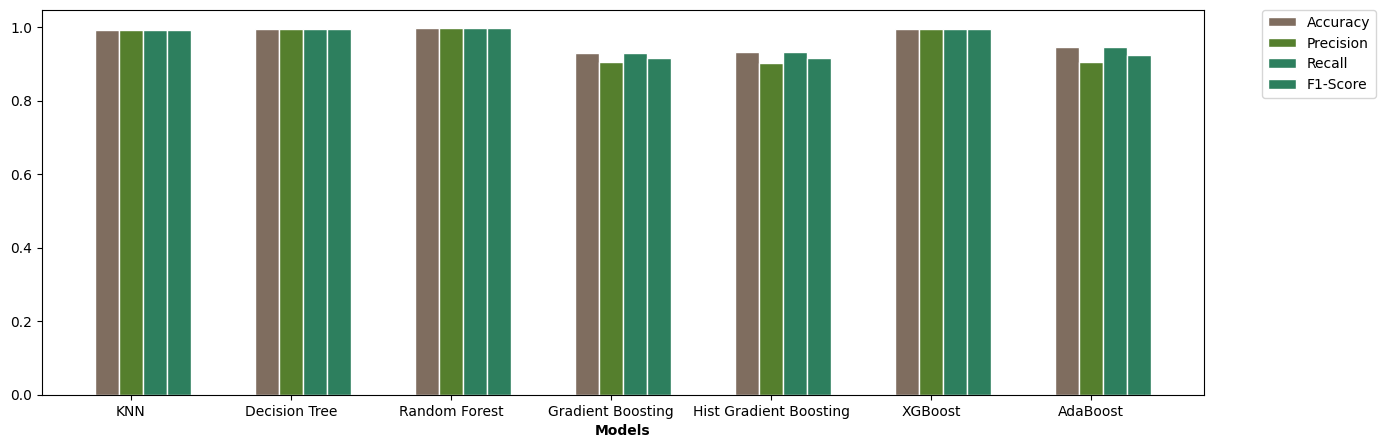

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "KNN",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Hist Gradient Boosting",
    "XGBoost",
    "AdaBoost",
]
accuracy = [
    k_nearest_neighbors_accuracy,
    decision_tree_accuracy,
    random_forest_classifier_accuracy,
    gradient_boosting_accuracy,
    hist_gradient_boosting_accuracy,
    xgboost_accuracy,
    ada_boost_accuracy,
]
precision = [
    k_nearest_neighbors_precision,
    decision_tree_precision,
    random_forest_classifier_precision,
    gradient_boosting_precision,
    hist_gradient_boosting_precision,
    xgboost_precision,
    ada_boost_precision,
]
recall = [
    k_nearest_neighbors_recall,
    decision_tree_recall,
    random_forest_classifier_recall,
    gradient_boosting_recall,
    hist_gradient_boosting_recall,
    xgboost_recall,
    ada_boost_recall,
]
f1_score = [
    k_nearest_neighbors_f1_score,
    decision_tree_f1_score,
    random_forest_classifier_f1_score,
    gradient_boosting_f1_score,
    hist_gradient_boosting_f1_score,
    xgboost_f1_score,
    ada_boost_f1_score,
]

barWidth = 0.15

r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(15, 5))

plt.bar(r1, accuracy, color="red", width=barWidth, edgecolor="white", label="Accuracy")
plt.bar(
    r2, precision, color="green", width=barWidth, edgecolor="white", label="Precision"
)
plt.bar(r3, recall, color="blue", width=barWidth, edgecolor="white", label="Recall")
plt.bar(
    r4, f1_score, color="yelow", width=barWidth, edgecolor="white", label="F1-Score"
)

plt.xlabel("Models", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(accuracy))], models)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

# Deep Learning


## CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_features = len(dataset.columns) - 1

# Define the CNN model
model = Sequential()
model.add(
    Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(num_features, 1))
)
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
216/216 [==============================] - 3s 10ms/step - loss: 0.3943 - accuracy: 0.9594
Epoch 2/10
216/216 [==============================] - 2s 10ms/step - loss: 0.0830 - accuracy: 0.9803
Epoch 3/10
216/216 [==============================] - 3s 12ms/step - loss: 0.0498 - accuracy: 0.9855
Epoch 4/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0384 - accuracy: 0.9913
Epoch 5/10
216/216 [==============================] - 3s 12ms/step - loss: 0.0334 - accuracy: 0.9922
Epoch 6/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 7/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0248 - accuracy: 0.9941
Epoch 8/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0210 - accuracy: 0.9939
Epoch 9/10
216/216 [==============================] - 3s 12ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 10/10
93/93 [==============================] - 1s 7ms/step - loss: 0.0608 - accuracy:

In [ ]:
print("Prediciton:    ", model)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(cnn_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(cnn_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x3b34ac370>
___________________________________________________________________________
Accuracy:	99.35724139213562%
Loss:		6.0834720730781555%


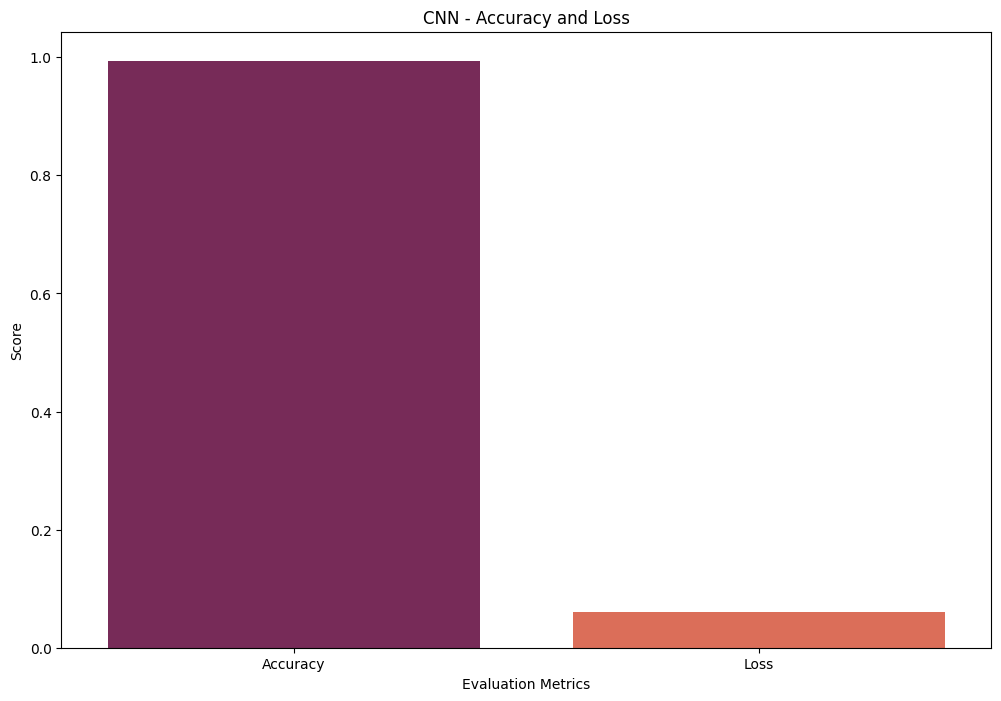

In [ ]:
season = ["Accuracy", "Loss"]
season_score = [cnn_accuracy, cnn_loss]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("CNN - Accuracy and Loss")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()

## Autoencoder


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Autoencoder model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(num_features,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(num_features, activation="linear"))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, X_train, epochs=10, batch_size=32)

# Use the trained model for anomaly detection
reconstructed_data = model.predict(X_test)
auto_encoder_loss = tf.keras.losses.mae(reconstructed_data, X_test)
auto_encoder_accuracy = tf.keras.metrics.binary_accuracy(reconstructed_data, X_test)

Epoch 1/10
216/216 [==============================] - 3s 10ms/step - loss: 0.3565
Epoch 2/10
216/216 [==============================] - 2s 8ms/step - loss: 0.1612
Epoch 3/10
216/216 [==============================] - 2s 8ms/step - loss: 0.1112
Epoch 4/10
216/216 [==============================] - 2s 8ms/step - loss: 0.0872
Epoch 5/10
216/216 [==============================] - 3s 12ms/step - loss: 0.0661
Epoch 6/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0744
Epoch 7/10
216/216 [==============================] - 2s 11ms/step - loss: 0.0443
Epoch 8/10
216/216 [==============================] - 2s 8ms/step - loss: 0.0402
Epoch 9/10
216/216 [==============================] - 2s 9ms/step - loss: 0.0697
Epoch 10/10
93/93 [==============================] - 0s 4ms/step


In [ ]:
print("Prediciton:    ", model)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(auto_encoder_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(auto_encoder_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x3d6a603a0>
___________________________________________________________________________
Accuracy:	[0. 0. 0. ... 0. 0. 0.]%
Loss:		[12.21520605  3.73984667  1.14583732 ...  1.06173377  9.38073958
  1.27744119]%


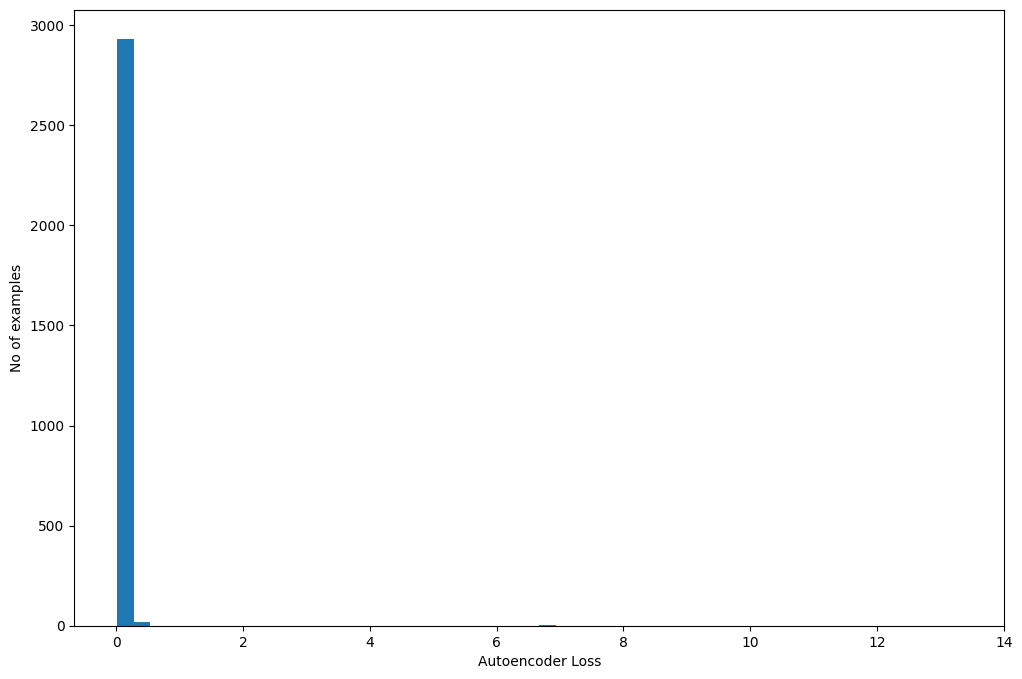

In [ ]:
# plot the loss distribution of the test set
plt.hist(auto_encoder_loss, bins=50)
plt.xlabel("Autoencoder Loss")
plt.ylabel("No of examples")
plt.show()

## Gated Recurrent Unit (GRU)


In [ ]:
# Apply gru to the dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model
model = Sequential()
model.add(GRU(32, input_shape=(num_features, 1)))
model.add(Dense(num_classes, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
gru_loss, gru_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
216/216 [==============================] - 6s 20ms/step - loss: 1.3850 - accuracy: 0.8391
Epoch 2/10
216/216 [==============================] - 5s 23ms/step - loss: 0.3270 - accuracy: 0.9281
Epoch 3/10
216/216 [==============================] - 5s 23ms/step - loss: 0.2434 - accuracy: 0.9398
Epoch 4/10
216/216 [==============================] - 5s 24ms/step - loss: 0.2023 - accuracy: 0.9555
Epoch 5/10
216/216 [==============================] - 5s 22ms/step - loss: 0.1738 - accuracy: 0.9640
Epoch 6/10
216/216 [==============================] - 5s 22ms/step - loss: 0.1549 - accuracy: 0.9710
Epoch 7/10
216/216 [==============================] - 6s 28ms/step - loss: 0.1409 - accuracy: 0.9720
Epoch 8/10
216/216 [==============================] - 4s 20ms/step - loss: 0.1318 - accuracy: 0.9730
Epoch 9/10
216/216 [==============================] - 4s 20ms/step - loss: 0.1235 - accuracy: 0.9738
Epoch 10/10
93/93 [==============================] - 2s 13ms/step - loss: 0.1345 - accuracy

In [ ]:
print("Prediciton:    ", model)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(gru_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(gru_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x3e4cb18a0>
___________________________________________________________________________
Accuracy:	96.98917269706726%
Loss:		13.44640702009201%


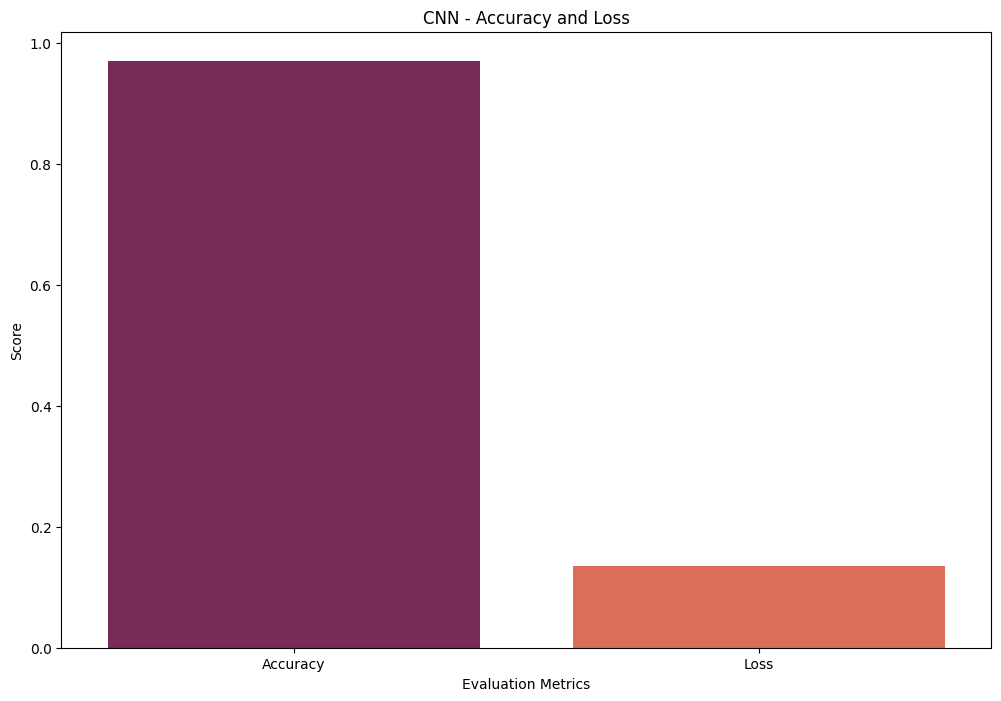

In [ ]:
season = ["Accuracy", "Loss"]
season_score = [gru_accuracy, gru_loss]

sns.barplot(x=season, y=season_score, palette="rocket")
plt.title("CNN - Accuracy and Loss")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.show()